In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [4]:
df = pd.read_csv('laptop_data_cleaned.csv')

In [5]:
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)


Dataset shape: (1273, 13)

Data types:
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object


In [6]:
import pandas as pd
df = pd.read_csv('laptop_data_cleaned.csv')
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Shape: (1273, 13)

Data Types:
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

First 5 rows of the dataset:
  Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel

In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               Ram       Weight        Price  TouchScreen          Ips  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      8.447761     2.041100    10.828218     0.146897     0.279654   
std       5.098771     0.669241     0.619565     0.354142     0.449006   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.387379     0.000000     0.000000   
50%       8.000000     2.040000    10.872255     0.000000     0.000000   
75%       8.000000     2.310000    11.287447     0.000000     1.000000   
max      64.000000     4.700000    12.691441     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1273.000000  1273.000000  1273.000000  
mean    146.950812   413.715632   186.252946  
std      42.926775   518.054486   186.531571  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.00000

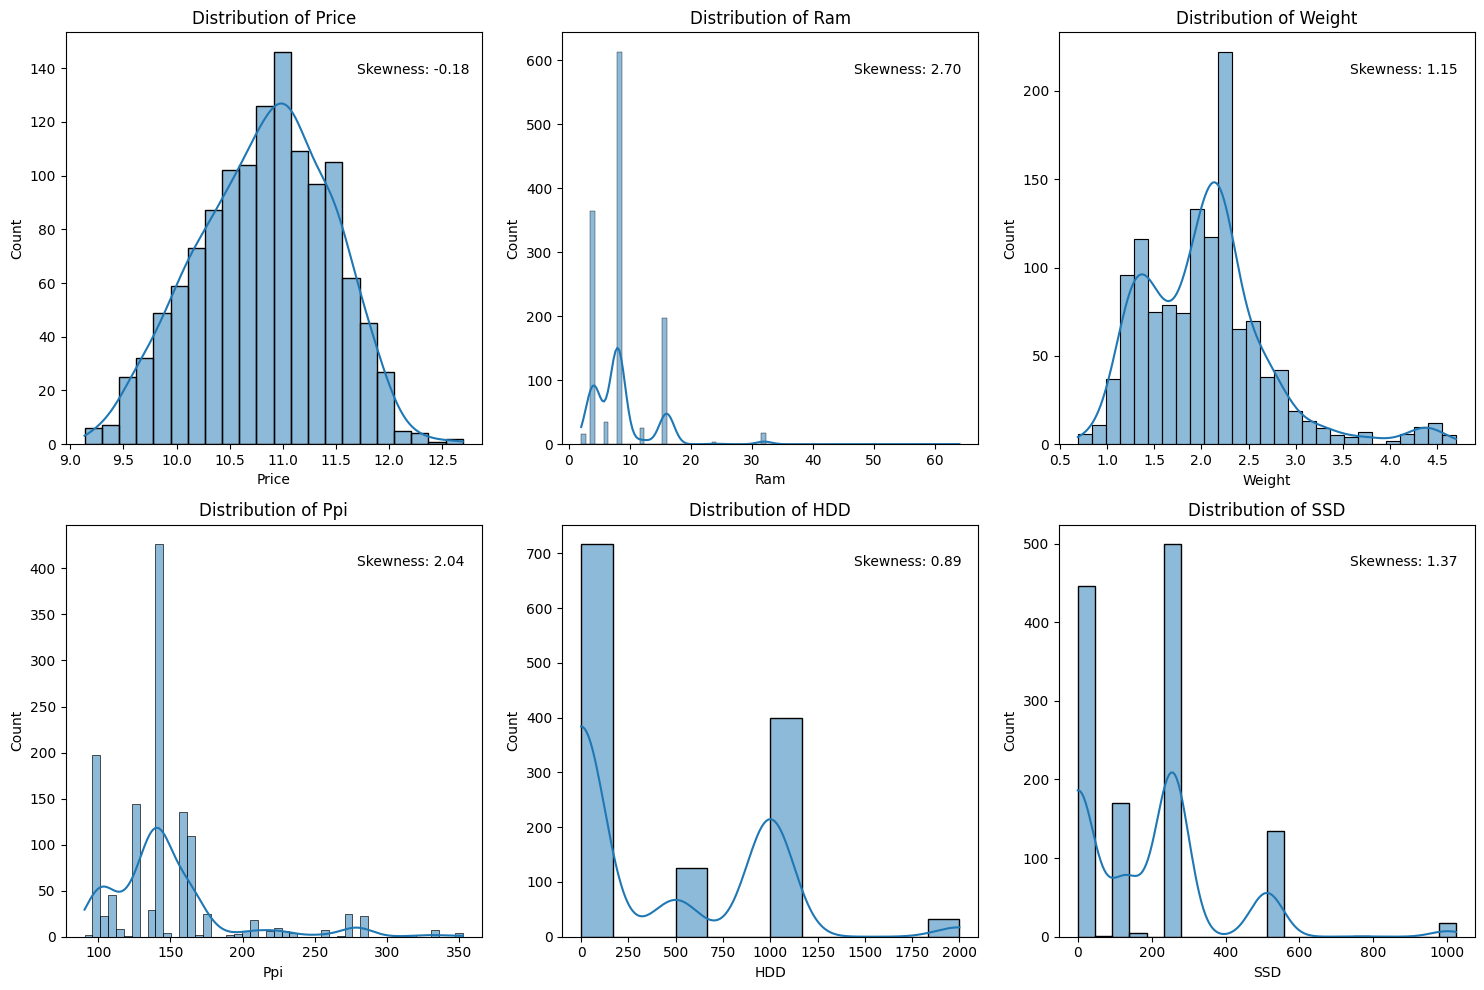

In [8]:
# DISTRIBUTIONS

# Numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Price', 'Ram', 'Weight', 'Ppi', 'HDD', 'SSD']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    skewness = skew(df[col].dropna())
    plt.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction')
plt.tight_layout()
plt.savefig('numerical_distributions.png')


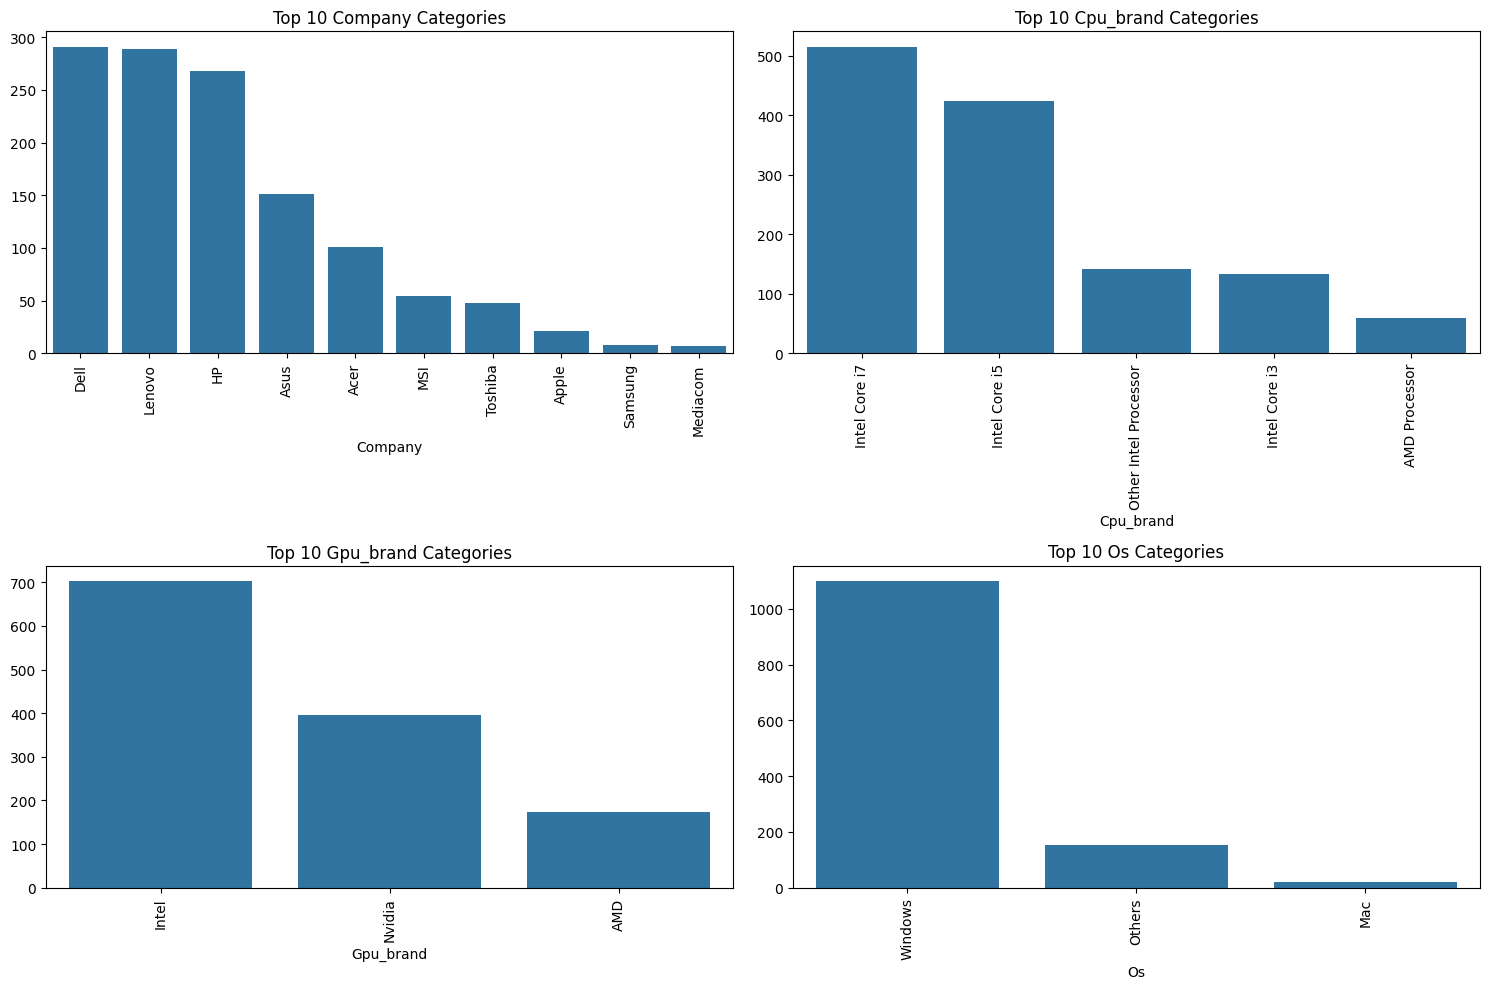

In [9]:
# Categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Company', 'Cpu_brand', 'Gpu_brand', 'Os']):
    plt.subplot(2, 2, i+1)
    top_categories = df[col].value_counts().head(10)
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top 10 {col} Categories')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('categorical_distributions.png')

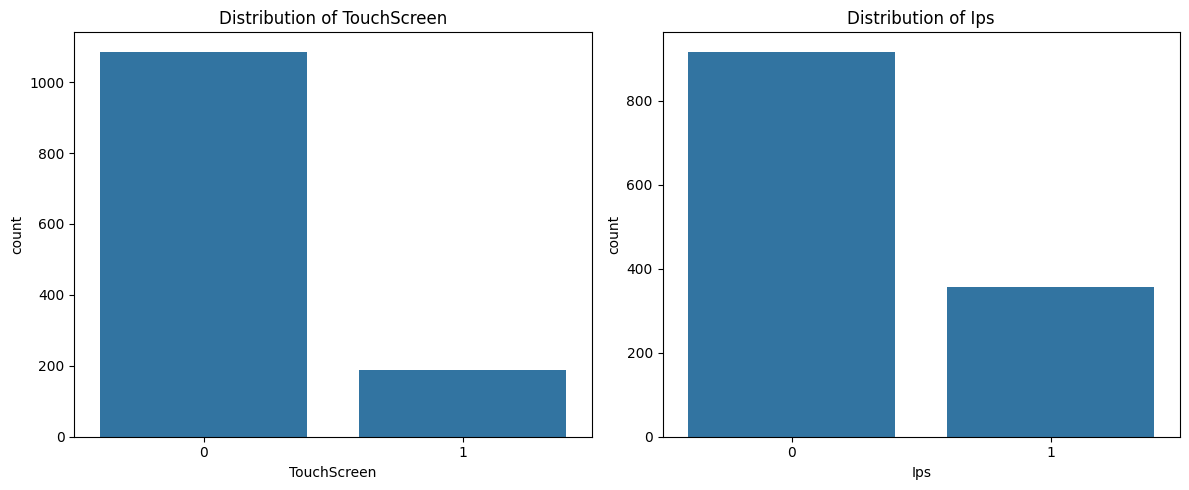

In [10]:
# Binary features
plt.figure(figsize=(12, 5))
for i, col in enumerate(['TouchScreen', 'Ips']):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('binary_distributions.png')

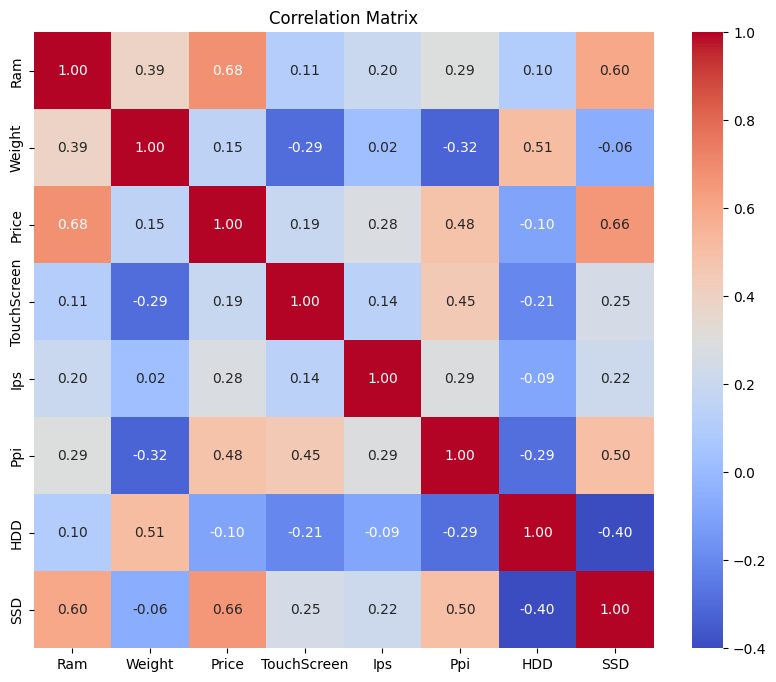

In [11]:
# CORRELATIONS

# Correlation matrix for numerical features
numerical_df = df[['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']]
correlation = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')



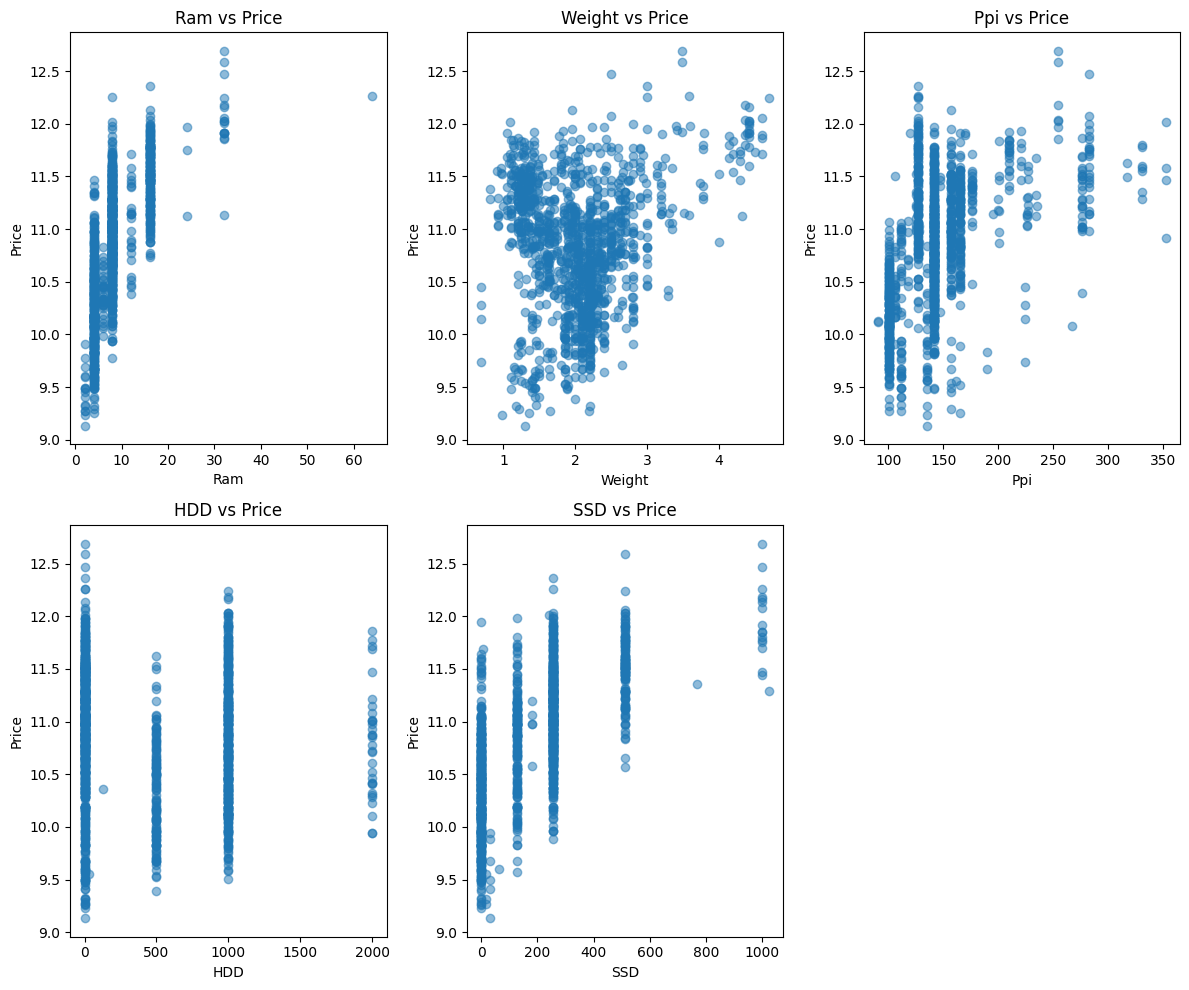

In [12]:
# Feature relationships with Price
plt.figure(figsize=(12, 10))
for i, col in enumerate(['Ram', 'Weight', 'Ppi', 'HDD', 'SSD']):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[col], df['Price'], alpha=0.5)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.savefig('feature_vs_price.png')

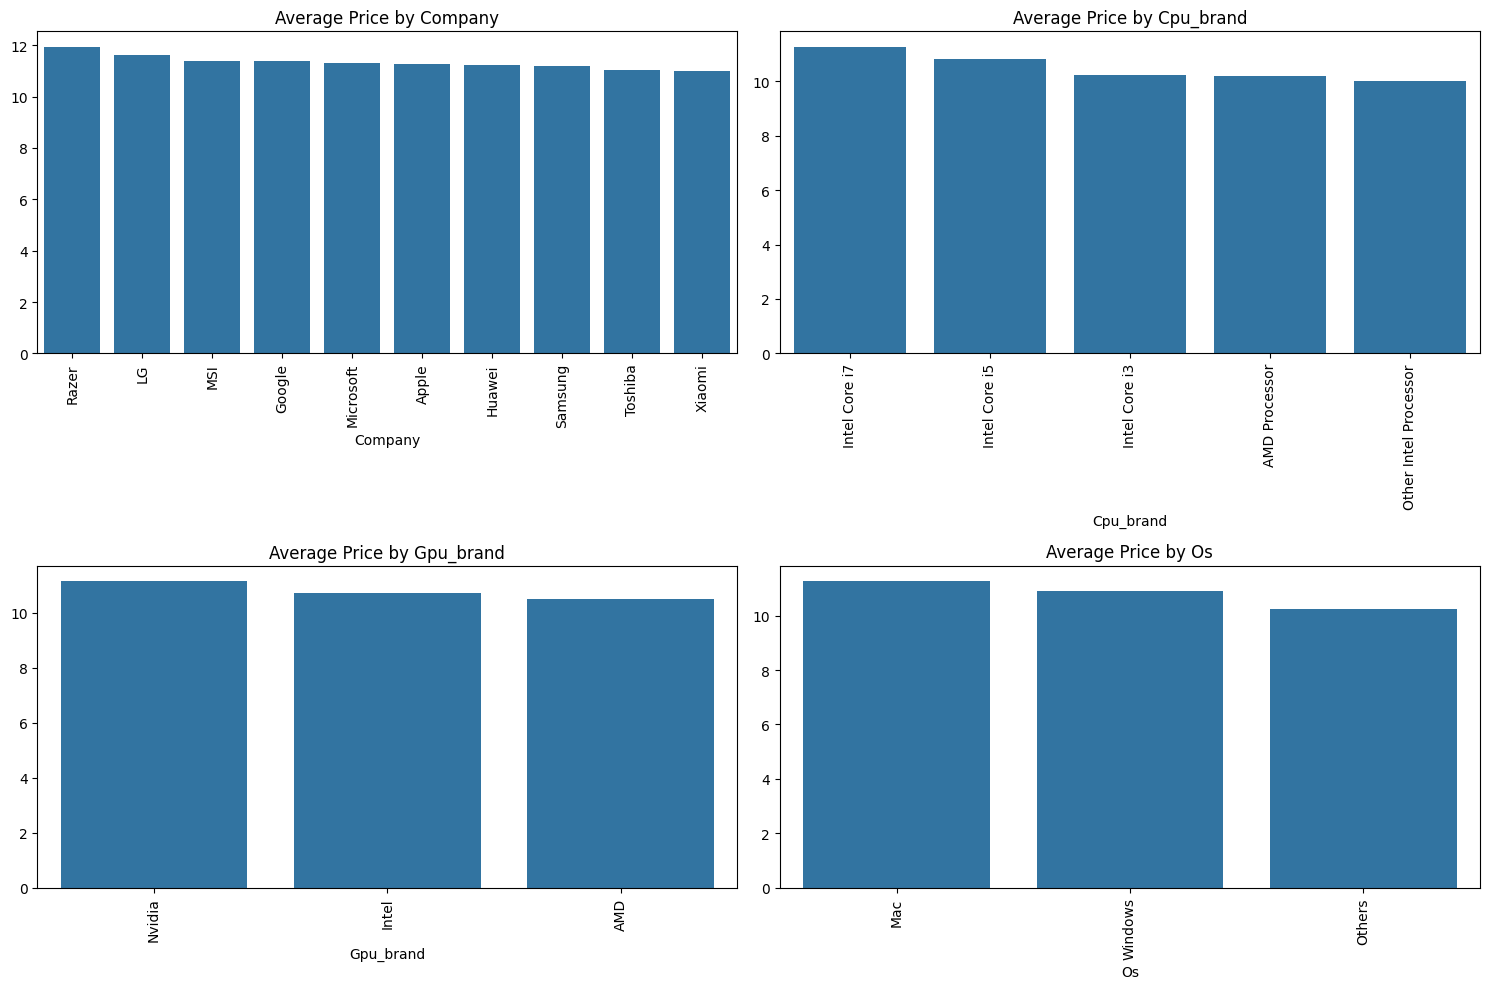

In [13]:
# Categorical features vs Price
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Company', 'Cpu_brand', 'Gpu_brand', 'Os']):
    plt.subplot(2, 2, i+1)
    data = df.groupby(col)['Price'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=data.index, y=data.values)
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('category_vs_price.png')

In [14]:
# Export correlation with Price
price_correlation = correlation['Price'].sort_values(ascending=False)
print("\nCorrelation with Price:")
print(price_correlation)


Correlation with Price:
Price          1.000000
Ram            0.680519
SSD            0.658808
Ppi            0.480687
Ips            0.279240
TouchScreen    0.194289
Weight         0.151386
HDD           -0.097361
Name: Price, dtype: float64


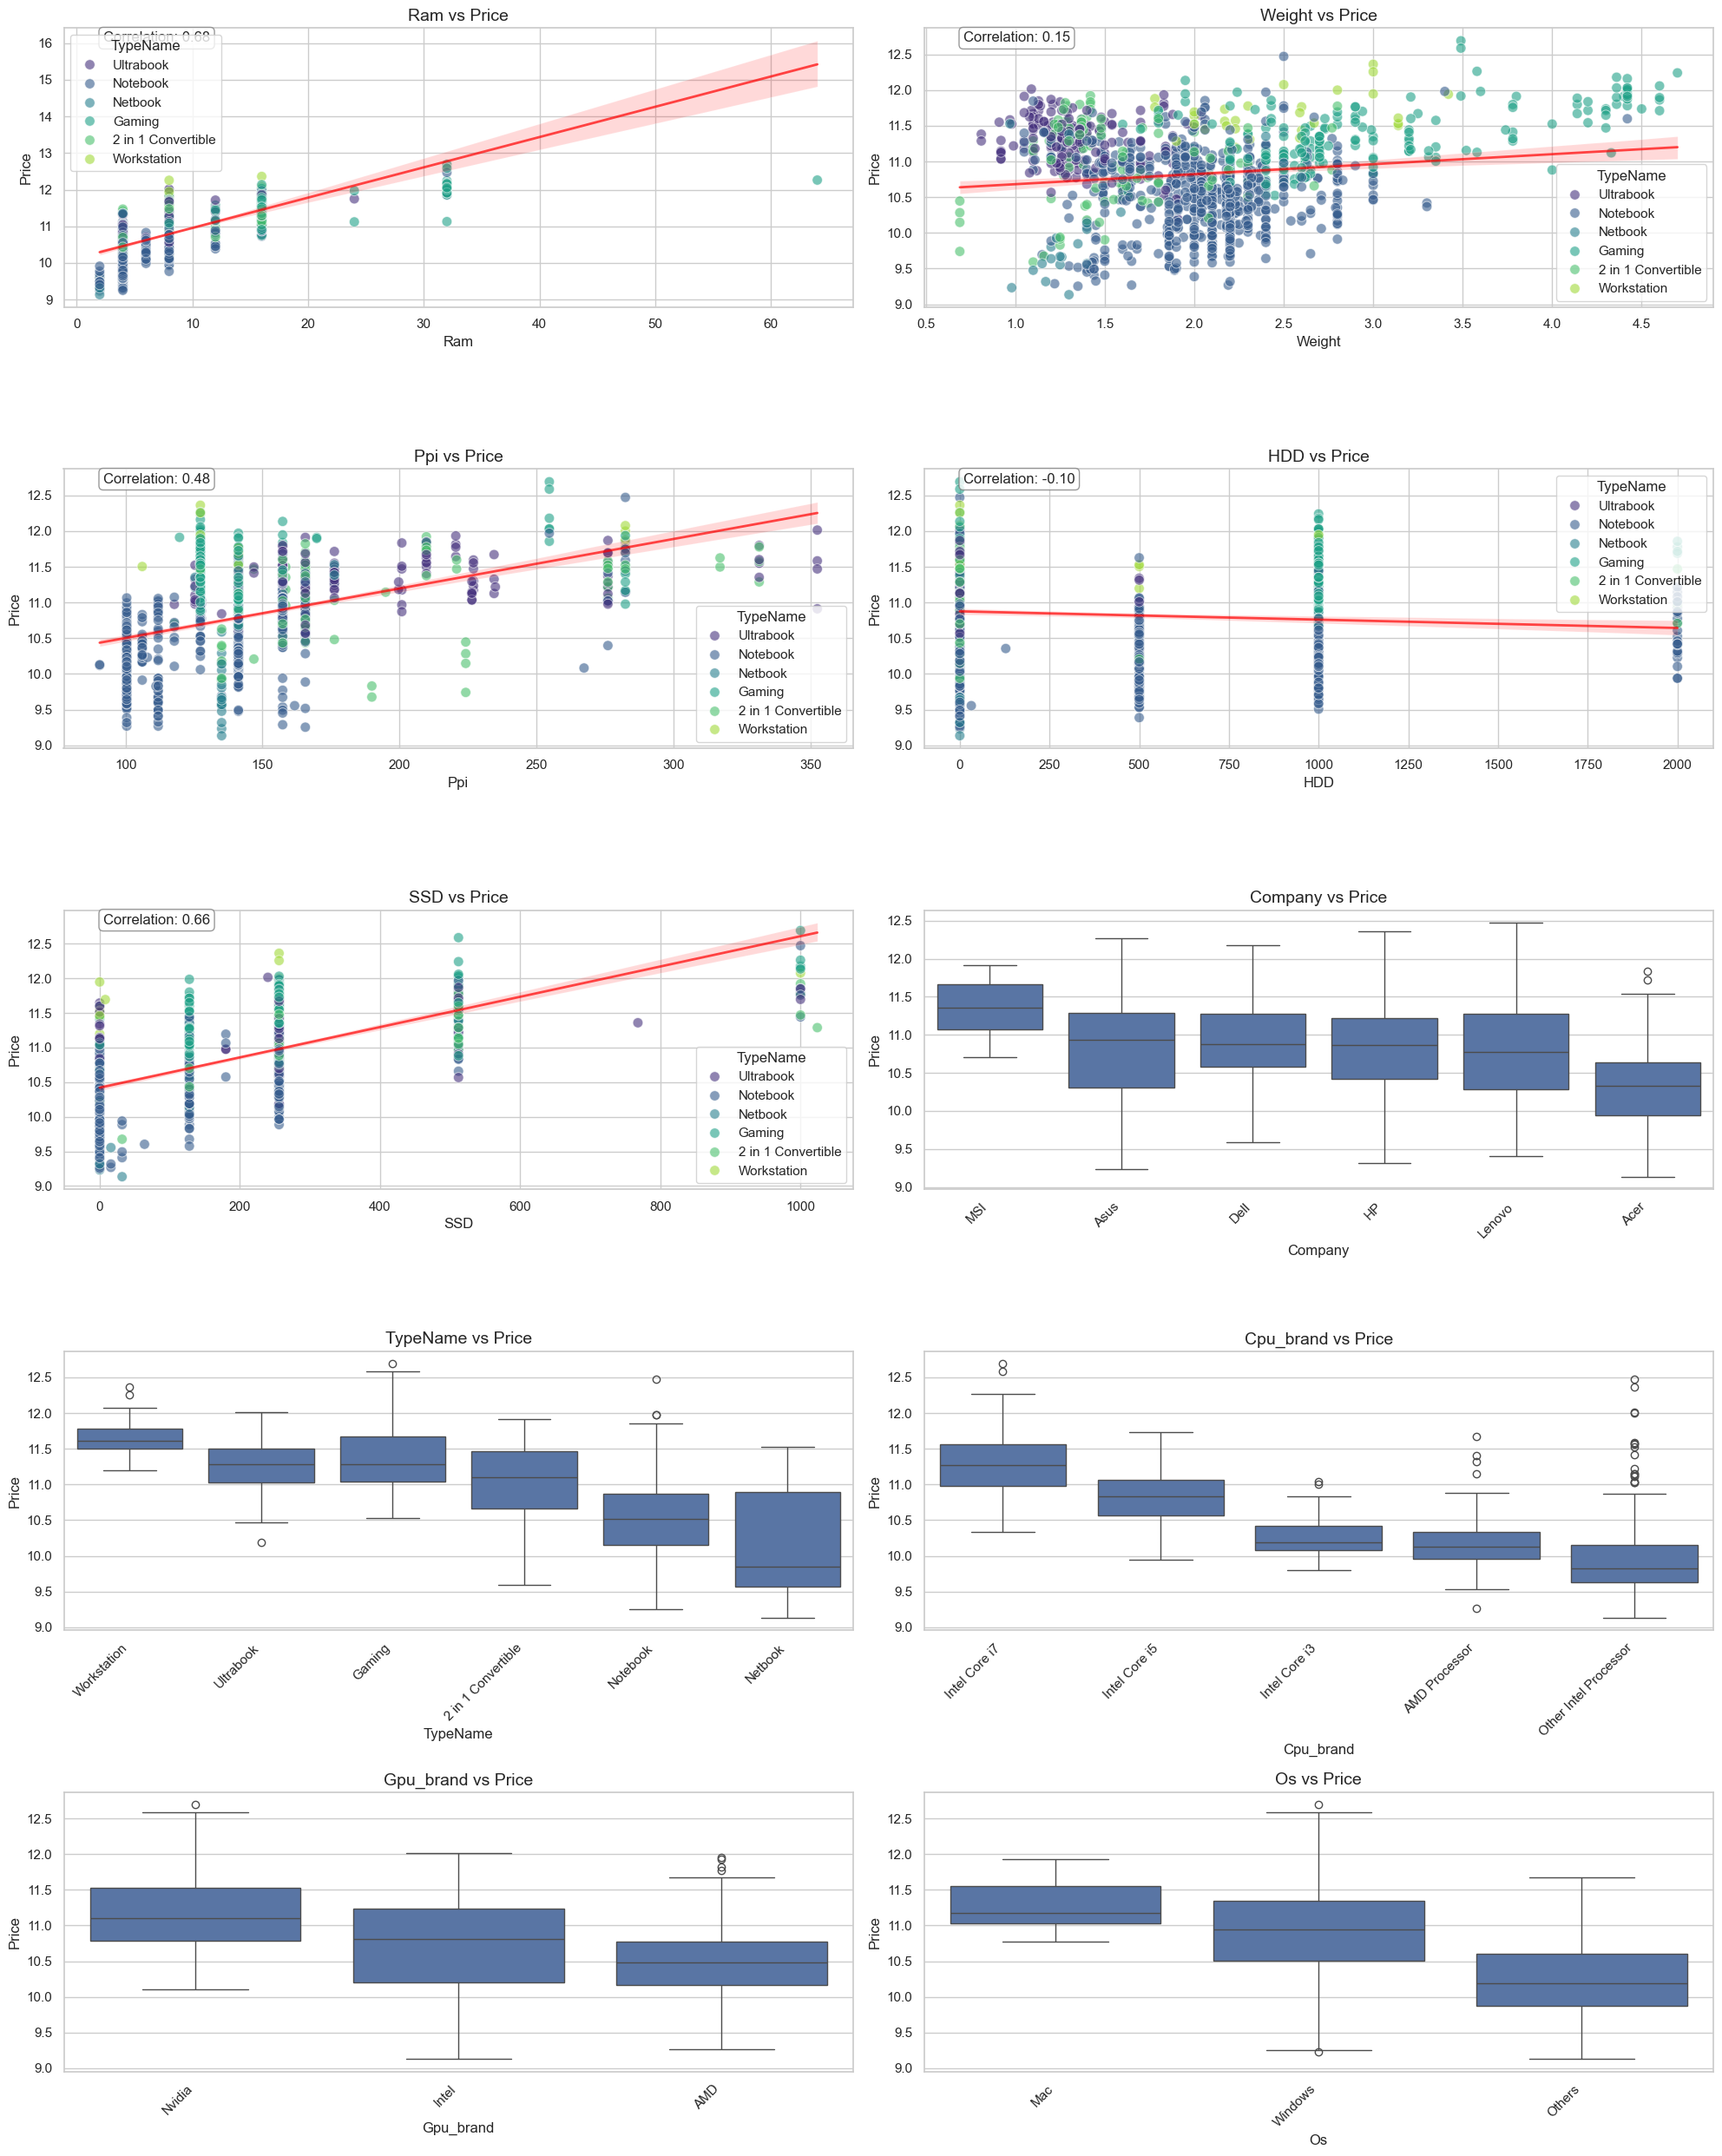

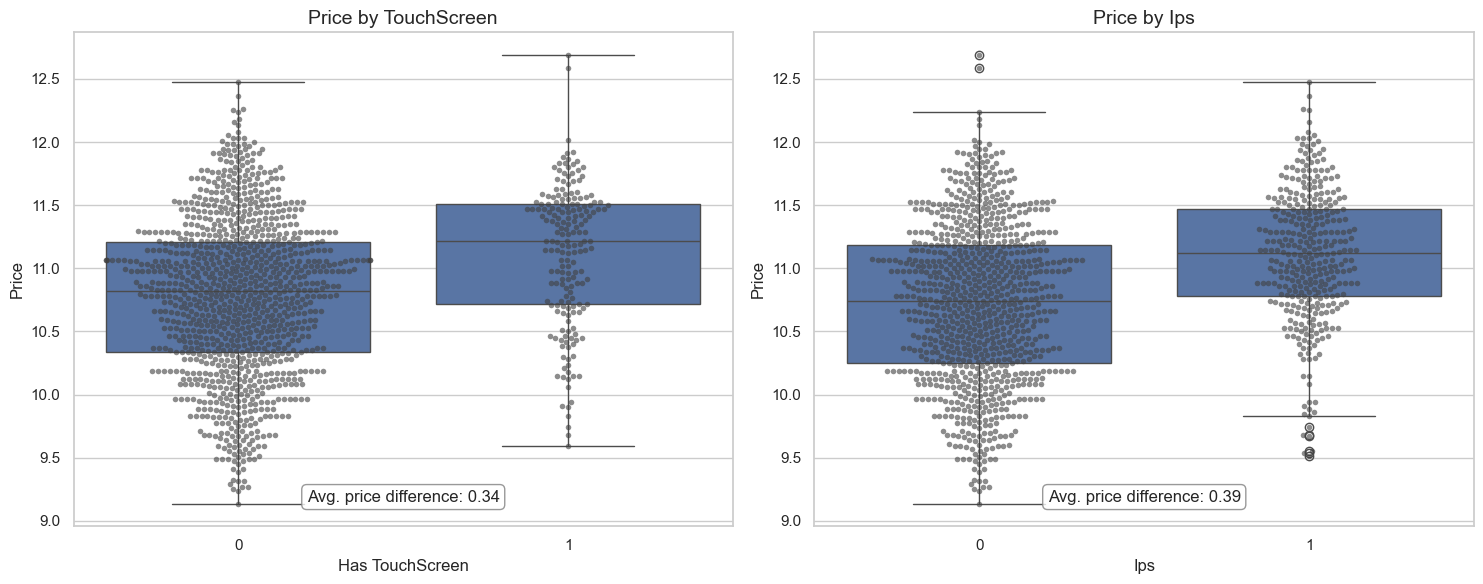

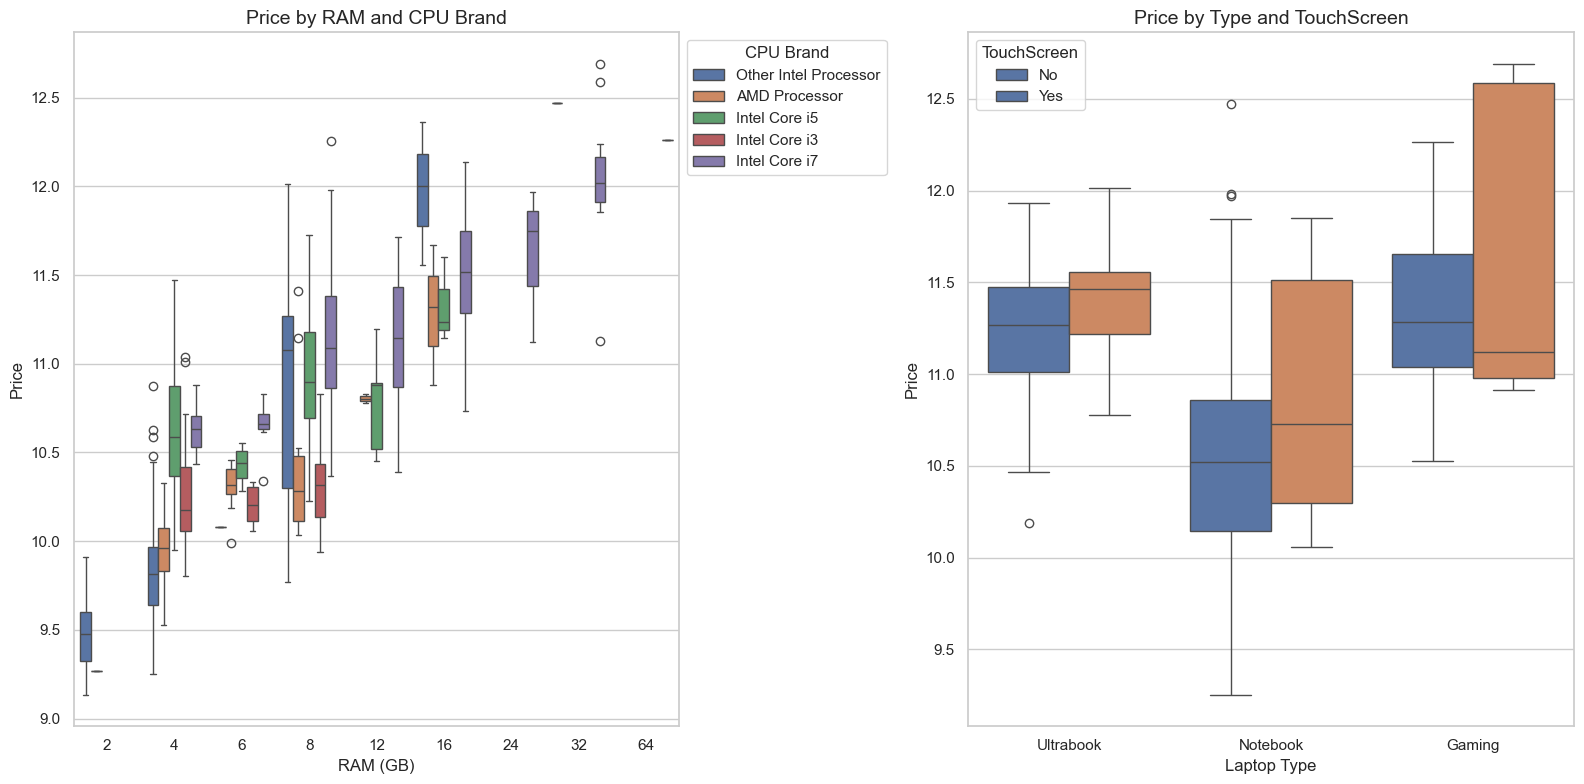

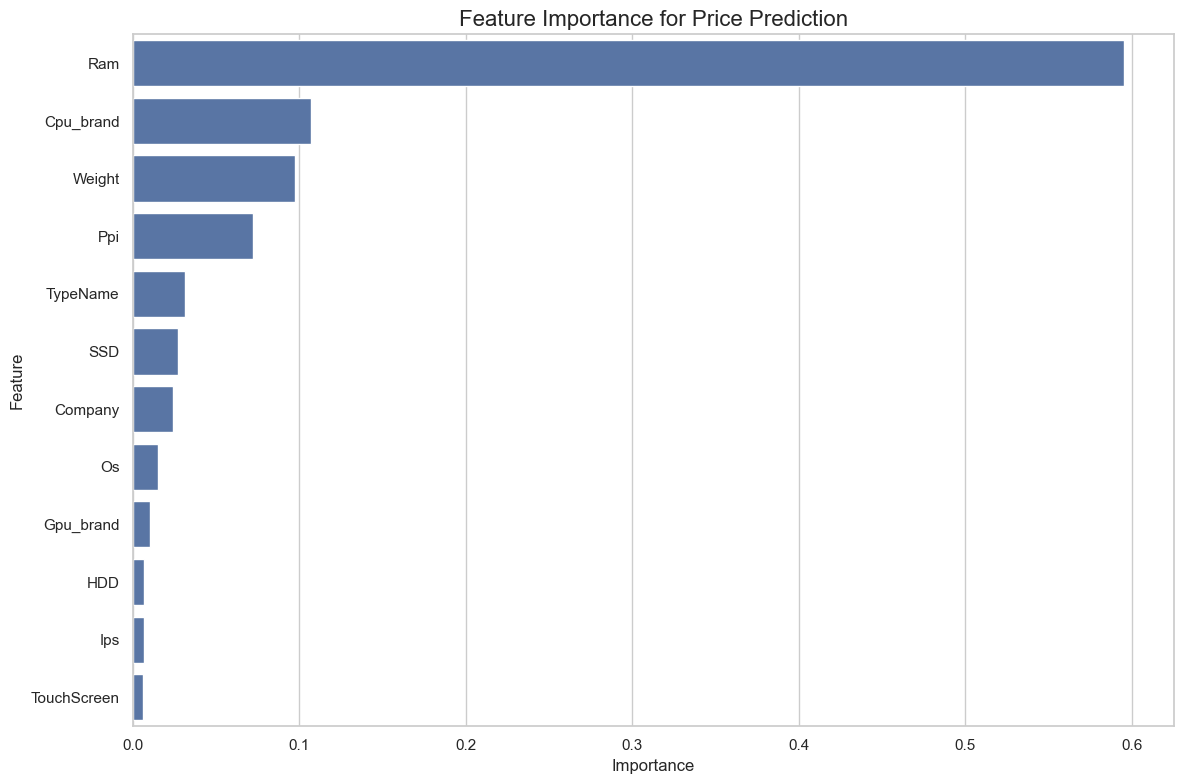

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset
df = pd.read_csv('laptop_data_cleaned.csv')

# Set the style for plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 25))

# 1. Numerical features vs Price (Scatter plots)
numerical_features = ['Ram', 'Weight', 'Ppi', 'HDD', 'SSD']

for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=feature, y='Price', data=df, alpha=0.6, hue='TypeName', 
                   palette='viridis', s=70)
    plt.title(f'{feature} vs Price', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # Add a trend line
    sns.regplot(x=feature, y='Price', data=df, scatter=False, 
               line_kws={"color": "red", "alpha": 0.7, "lw": 2})
    
    # Add annotation with correlation coefficient
    corr = df[[feature, 'Price']].corr().iloc[0, 1]
    plt.annotate(f'Correlation: {corr:.2f}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# 2. Categorical features vs Price (Box plots)
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i+6)
    
    # For features with many categories, show only top ones
    if feature == 'Company':
        # Get top companies by frequency
        top_companies = df['Company'].value_counts().nlargest(6).index
        data = df[df['Company'].isin(top_companies)]
        # Sort by median price
        order = data.groupby('Company')['Price'].median().sort_values(ascending=False).index
        sns.boxplot(x='Company', y='Price', data=data, order=order)
    else:
        # Sort by median price
        order = df.groupby(feature)['Price'].median().sort_values(ascending=False).index
        sns.boxplot(x=feature, y='Price', data=df, order=order)
    
    plt.title(f'{feature} vs Price', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.savefig('feature_price_relationships.png')

# 3. Create a separate plot for binary features
plt.figure(figsize=(15, 6))

binary_features = ['TouchScreen', 'Ips']

for i, feature in enumerate(binary_features):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=feature, y='Price', data=df)
    
    # Add swarmplot to see distribution
    sns.swarmplot(x=feature, y='Price', data=df, color=".25", size=4, alpha=0.6)
    
    plt.title(f'Price by {feature}', fontsize=14)
    plt.xlabel(f'Has {feature}' if feature == 'TouchScreen' else feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # Calculate and display average price difference
    means = df.groupby(feature)['Price'].mean()
    if len(means) > 1:
        diff = means[1] - means[0]
        plt.annotate(f'Avg. price difference: {diff:.2f}', 
                    xy=(0.5, 0.05), xycoords='axes fraction', ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('binary_feature_price_relationships.png')

# 4. Advanced Feature Combinations
plt.figure(figsize=(16, 8))

# RAM and CPU brand interaction
plt.subplot(1, 2, 1)
sns.boxplot(x='Ram', y='Price', hue='Cpu_brand', data=df)
plt.title('Price by RAM and CPU Brand', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='CPU Brand', loc='upper left', bbox_to_anchor=(1, 1))

# TypeName and TouchScreen interaction
plt.subplot(1, 2, 2)
top_types = df['TypeName'].value_counts().nlargest(3).index
data = df[df['TypeName'].isin(top_types)]
sns.boxplot(x='TypeName', y='Price', hue='TouchScreen', data=data)
plt.title('Price by Type and TouchScreen', fontsize=14)
plt.xlabel('Laptop Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='TouchScreen', labels=['No', 'Yes'])

plt.tight_layout()
plt.savefig('advanced_feature_combinations.png')

# 5. Advanced Analysis: Feature Importance for Price Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for model training
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
for cat_feat in categorical_features:
    label_encoders[cat_feat] = LabelEncoder()
    df_model[cat_feat] = label_encoders[cat_feat].fit_transform(df_model[cat_feat])

# Define X and y
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Price Prediction', fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance.png')


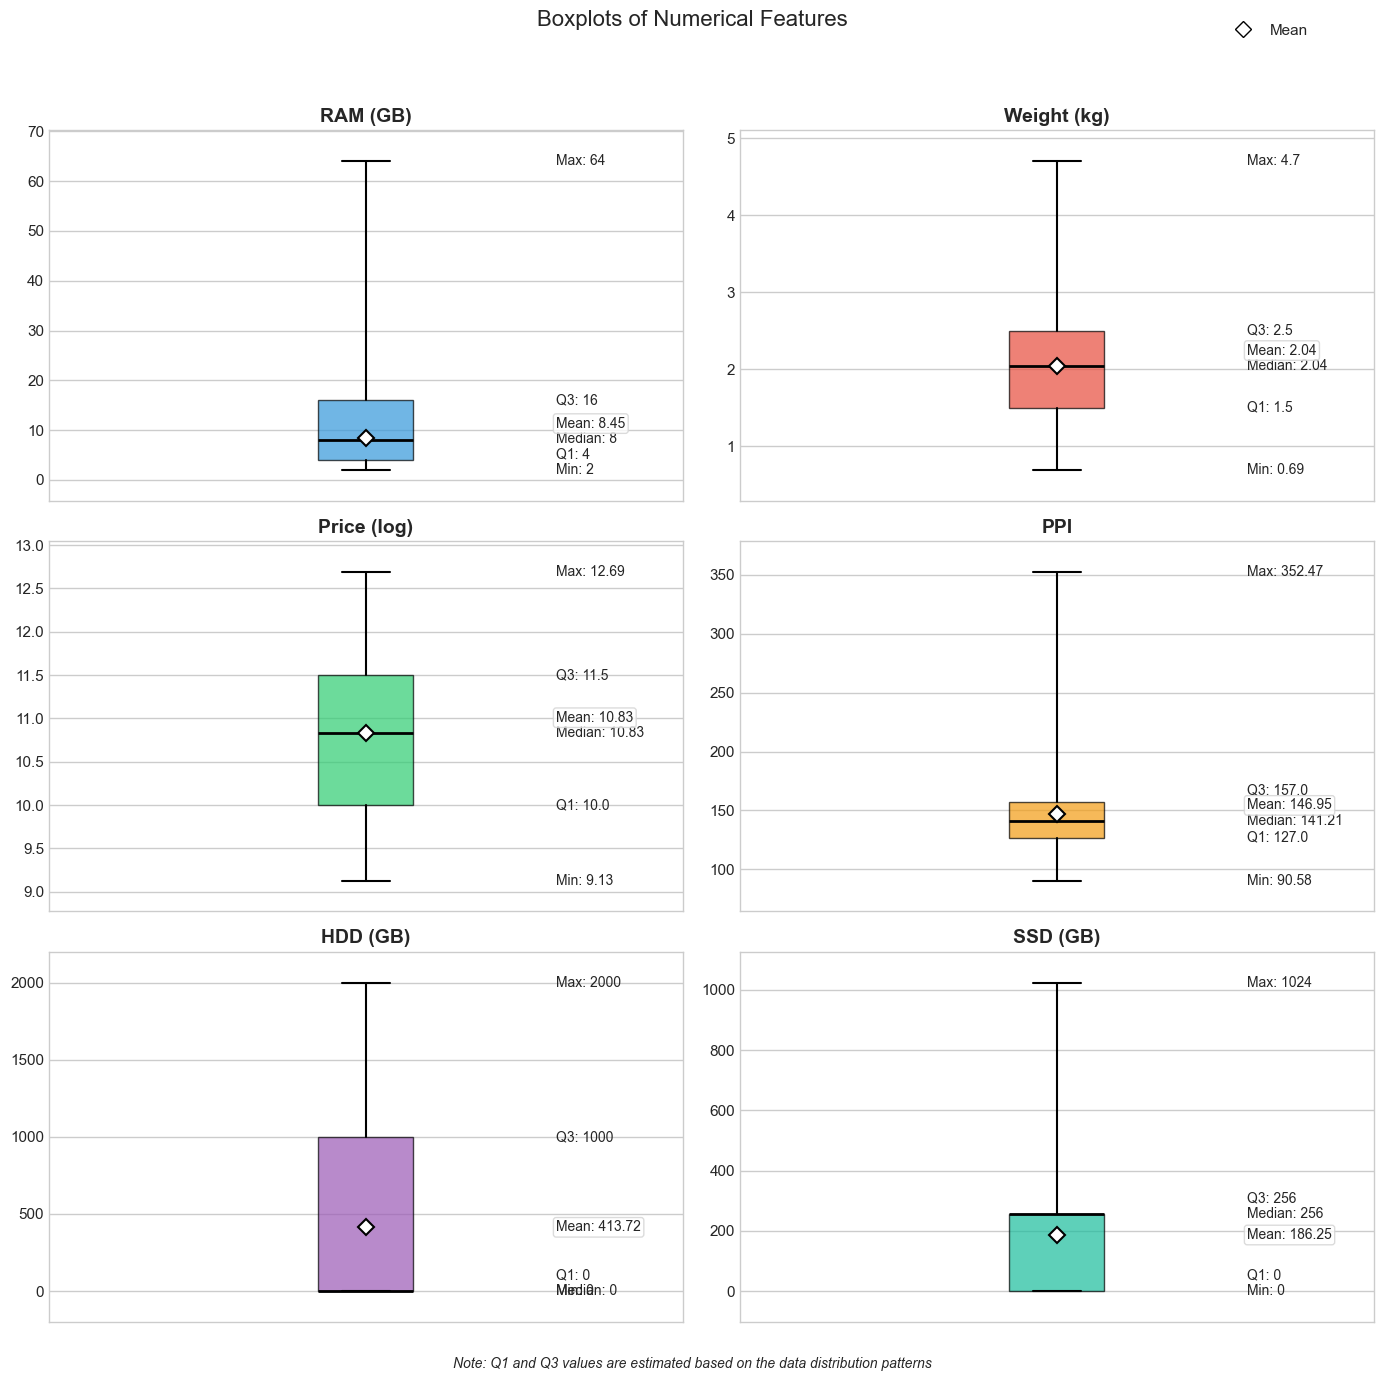

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Create a figure with a good size and more vertical space
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.subplots_adjust(hspace=0.5)
axs = axs.flatten()

# Define features data with estimated quartiles
features_data = {
    'RAM (GB)': {
        'min': 2,
        'q1': 4,
        'median': 8,
        'q3': 16,
        'max': 64,
        'mean': 8.45
    },
    'Weight (kg)': {
        'min': 0.69,
        'q1': 1.5,
        'median': 2.04,
        'q3': 2.5,
        'max': 4.7,
        'mean': 2.04
    },
    'Price (log)': {
        'min': 9.13,
        'q1': 10.0,
        'median': 10.83,
        'q3': 11.5,
        'max': 12.69,
        'mean': 10.83
    },
    'PPI': {
        'min': 90.58,
        'q1': 127.0,
        'median': 141.21,
        'q3': 157.0,
        'max': 352.47,
        'mean': 146.95
    },
    'HDD (GB)': {
        'min': 0,
        'q1': 0,
        'median': 0,
        'q3': 1000,
        'max': 2000,
        'mean': 413.72
    },
    'SSD (GB)': {
        'min': 0,
        'q1': 0,
        'median': 256,
        'q3': 256,
        'max': 1024,
        'mean': 186.25
    }
}

# Colors for each boxplot
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

# Create each boxplot
for i, (feature, data) in enumerate(features_data.items()):
    # Get the current axis
    ax = axs[i]
    
    # Create boxplot data from the statistics
    # We need to format it as a list of lists for the boxplot function
    boxplot_stats = [{
        'med': data['median'],
        'q1': data['q1'],
        'q3': data['q3'],
        'whislo': data['min'],
        'whishi': data['max']
    }]
    
    # Create custom boxplot
    box = ax.bxp(boxplot_stats, showfliers=False, patch_artist=True)
    
    # Customize boxplot appearance
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
        patch.set_alpha(0.7)
    
    for whisker in box['whiskers']:
        whisker.set(color='black', linewidth=1.5)
    
    for cap in box['caps']:
        cap.set(color='black', linewidth=1.5)
    
    for median in box['medians']:
        median.set(color='black', linewidth=2)
    
    # Add a point for the mean
    ax.plot(1, data['mean'], 'D', color='white', markeredgecolor='black', 
            markersize=8, markeredgewidth=1.5, zorder=10)
    
    # Set the y-limits with some padding
    value_range = data['max'] - data['min']
    padding = value_range * 0.1
    ax.set_ylim(data['min'] - padding, data['max'] + padding)
    
    # Remove x-ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    # Add feature name as title
    ax.set_title(feature, fontsize=14, fontweight='bold')
    
    # Improve text placement to avoid overlap
    # Calculate y-position adjustments to avoid overlapping labels
    y_positions = [data['min'], data['q1'], data['median'], data['q3'], data['max'], data['mean']]
    y_positions.sort()
    
    # Add annotations in a more organized way - position the text to the right
    # with vertical offset to prevent overlap
    
    # Calculate text offset to prevent overlap
    # Check if values are too close to each other
    min_distance = value_range * 0.05  # 5% of range as minimum distance
    
    # This will hold our adjusted y positions
    adjusted_positions = {}
    
    # First pass - identify potential overlaps
    for stat in ['min', 'q1', 'median', 'q3', 'max', 'mean']:
        # Start with the original position
        adjusted_positions[stat] = data[stat]
    
    # Second pass - adjust positions to avoid overlap
    # Sort stats by their value so we can process from bottom to top
    stats_sorted = sorted(['min', 'q1', 'median', 'q3', 'max', 'mean'], key=lambda x: data[x])
    
    for idx, stat in enumerate(stats_sorted):
        if idx > 0:
            prev_stat = stats_sorted[idx-1]
            if abs(adjusted_positions[stat] - adjusted_positions[prev_stat]) < min_distance:
                adjusted_positions[stat] = adjusted_positions[prev_stat] + min_distance
    
    # Place text using adjusted positions
    for stat in ['min', 'q1', 'median', 'q3', 'max']:
        ax.text(1.3, adjusted_positions[stat], f"{stat.capitalize()}: {data[stat]}", 
                va='center', ha='left', fontsize=10)
    
    # Add mean in a box to make it stand out
    ax.text(1.3, adjusted_positions['mean'], f"Mean: {data['mean']}", va='center', ha='left', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2', edgecolor='lightgray'))

# Add a main title with more space at the top
plt.suptitle('Boxplots of Numerical Features', fontsize=16, y=0.98)

# Add a note about estimated quartiles with more space at the bottom
fig.text(0.5, 0.01, 'Note: Q1 and Q3 values are estimated based on the data distribution patterns', 
         ha='center', fontsize=10, style='italic')

# Add a legend for the mean marker
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='D', color='w', markerfacecolor='w', 
                          markeredgecolor='black', markersize=8, label='Mean')]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.95, 0.98))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for title and note
plt.savefig('laptop_features_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


Explained variance ratio: [0.33473943 0.28559394 0.12307113 0.10049663 0.0716292  0.04611738
 0.03835228]

Cumulative explained variance: [0.33473943 0.62033338 0.74340451 0.84390114 0.91553034 0.96164772
 1.        ]

Feature loadings on PC1 and PC2:
Ram: PC1=0.538, PC2=0.218
Weight: PC1=0.150, PC2=0.599
Price: PC1=0.562, PC2=0.007
TouchScreen: PC1=0.248, PC2=-0.411
Ips: PC1=0.314, PC2=-0.120
Ppi: PC1=0.417, PC2=-0.405
TotalStorage: PC1=0.196, PC2=0.498


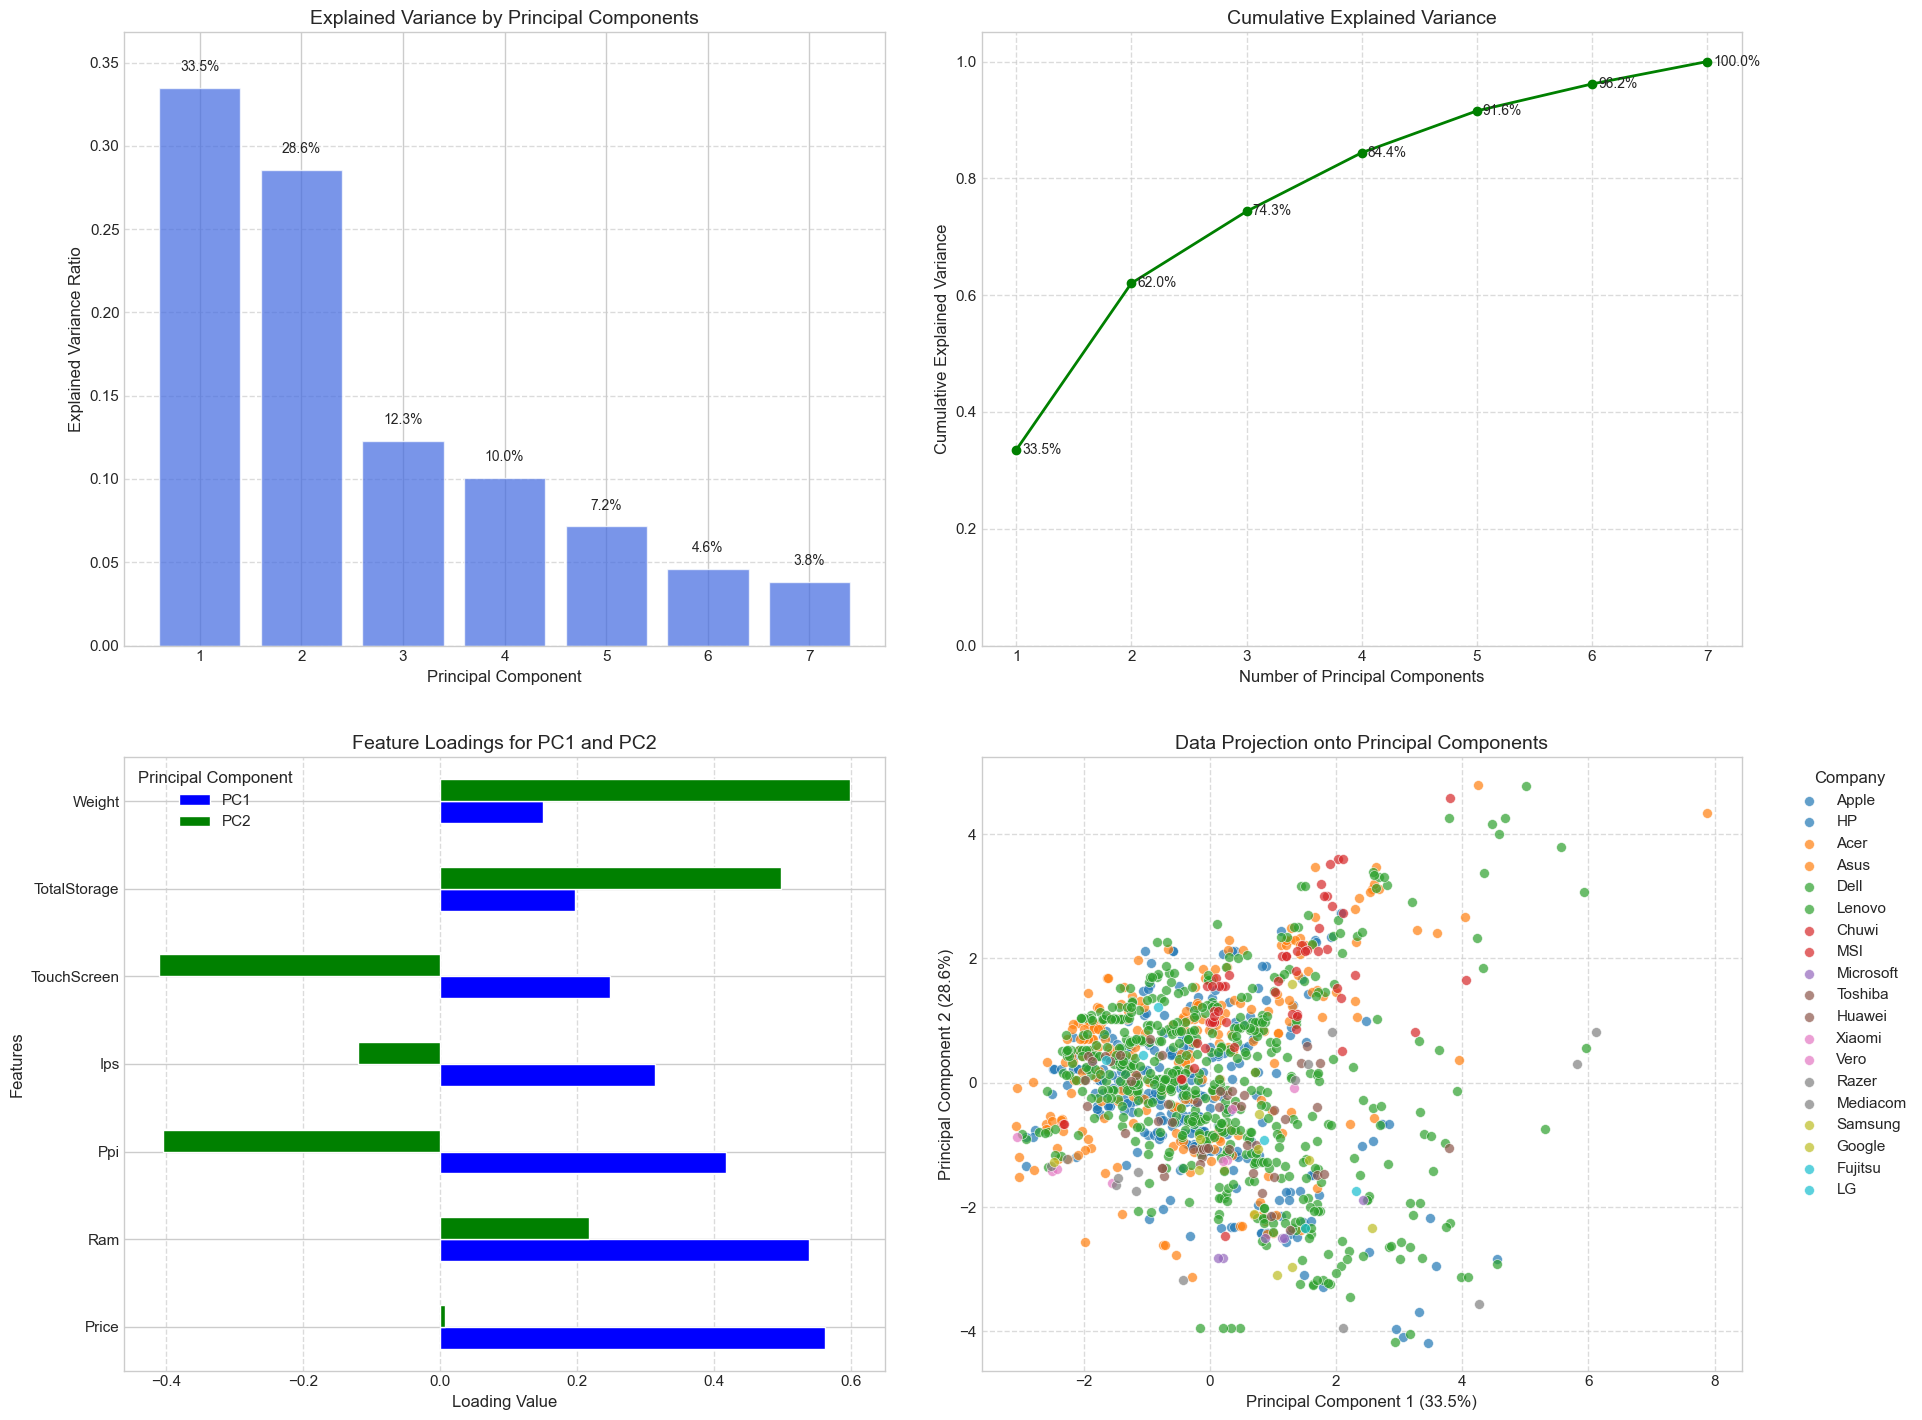

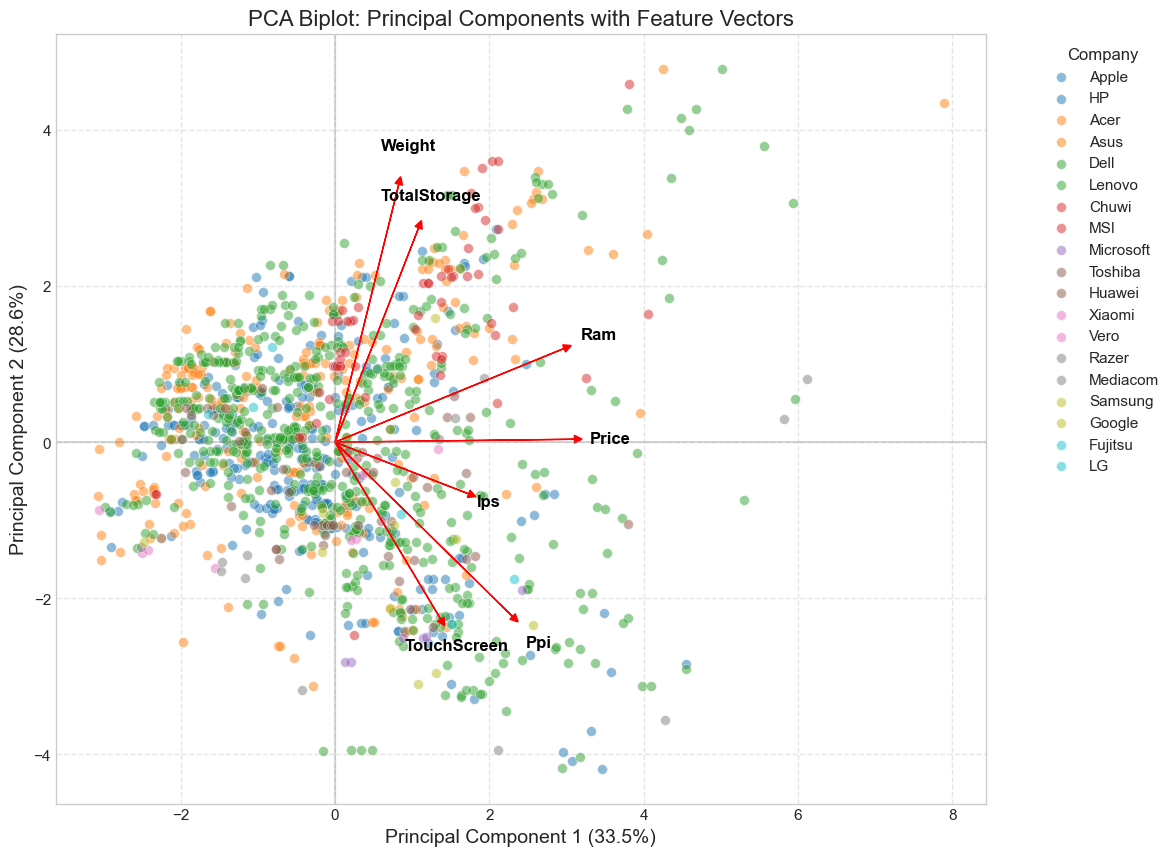

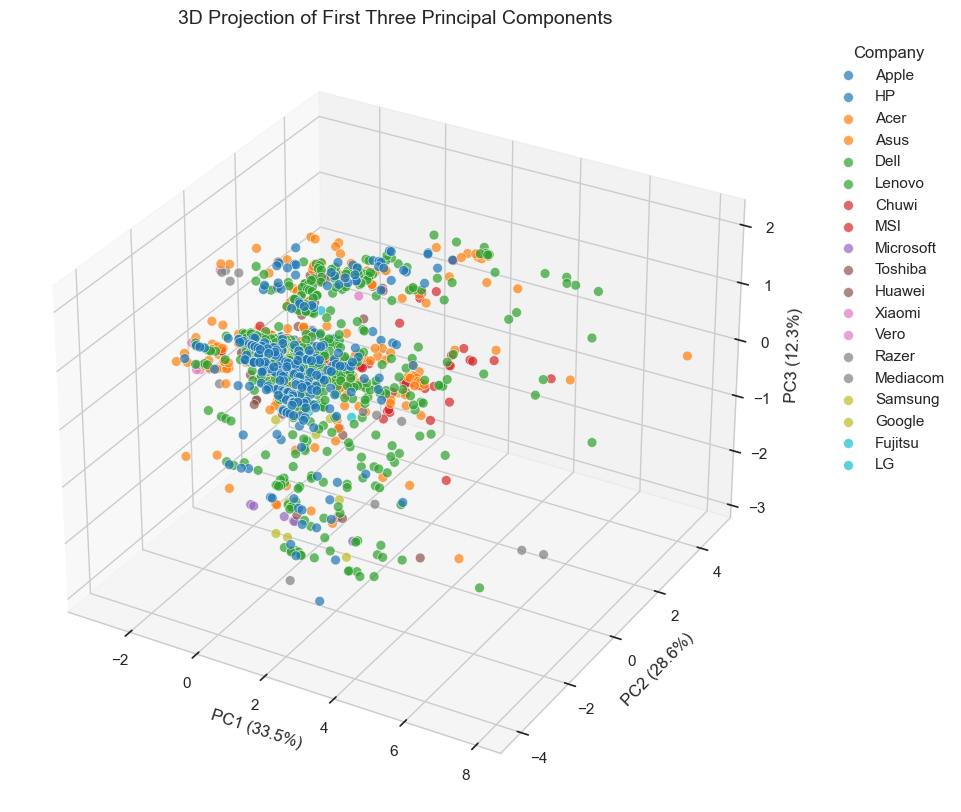

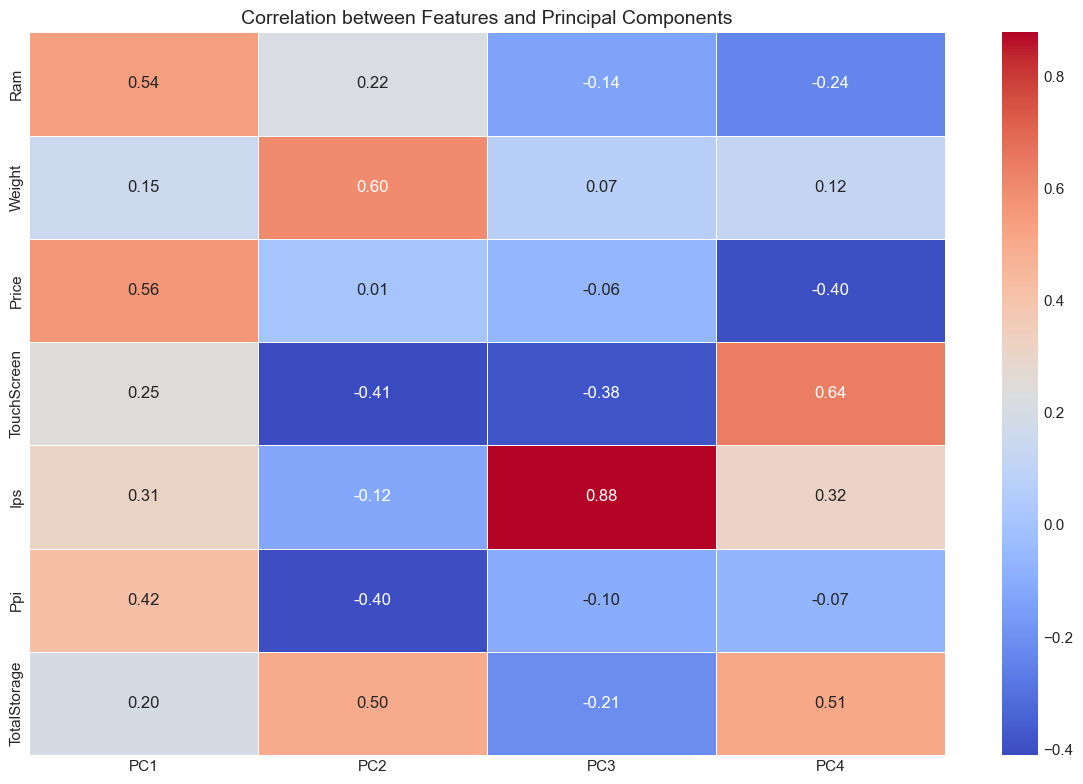

In [17]:
# PCA WITH TOTAL STORAGE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12

# Load the dataset
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Select features for PCA - excluding SSD and HDD as requested
features = ['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(
    data=X_pca[:, 0:2],
    columns=['PC1', 'PC2']
)

# Add laptop information to the PCA DataFrame
pca_df['Company'] = df['Company']
pca_df['Price'] = df['Price']
pca_df['Ram'] = df['Ram']
pca_df['TotalStorage'] = df['TotalStorage']

# Extract PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
loadings = pca.components_

# Create a figure with subplots
fig = plt.figure(figsize=(20, 15))

# 1. Explained Variance by Principal Components (Bar Chart)
ax1 = fig.add_subplot(2, 2, 1)
bars = ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='royalblue')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Explained Variance by Principal Components', fontsize=14)
ax1.set_xticks(range(1, len(explained_variance) + 1))
ax1.set_ylim(0, max(explained_variance) * 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', fontsize=10)

# 2. Cumulative Explained Variance (Line Chart)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', color='green', linewidth=2)
ax2.set_xlabel('Number of Principal Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14)
ax2.set_xticks(range(1, len(cumulative_variance) + 1))
ax2.set_ylim(0, 1.05)
ax2.grid(linestyle='--', alpha=0.7)

# Add percentage labels
for i, v in enumerate(cumulative_variance):
    ax2.text(i + 1.05, v, f'{v:.1%}', va='center', fontsize=10)

# 3. Feature Loadings (Horizontal Bar Chart)
ax3 = fig.add_subplot(2, 2, 3)
feature_loadings = pd.DataFrame(
    data=loadings.T[:, 0:2],
    columns=['PC1', 'PC2'],
    index=features
)
feature_loadings.sort_values(by='PC1', ascending=False, inplace=True)

# Plot horizontal bar chart for loadings
color_dict = {'PC1': 'blue', 'PC2': 'green'}
feature_loadings.plot(kind='barh', color=color_dict, ax=ax3)
ax3.set_title('Feature Loadings for PC1 and PC2', fontsize=14)
ax3.set_xlabel('Loading Value', fontsize=12)
ax3.set_ylabel('Features', fontsize=12)
ax3.grid(axis='x', linestyle='--', alpha=0.7)
ax3.legend(title='Principal Component')

# 4. Data Projection onto Principal Components (Scatter Plot)
ax4 = fig.add_subplot(2, 2, 4)

# Define a color map for companies
companies = df['Company'].unique()
colors = cm.tab10(np.linspace(0, 1, len(companies)))
company_colors = dict(zip(companies, colors))

# Create scatter plot
for company, color in company_colors.items():
    mask = pca_df['Company'] == company
    ax4.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        color=color,
        alpha=0.7,
        label=company,
        edgecolors='w',
        linewidth=0.5,
        s=50
    )

ax4.set_title('Data Projection onto Principal Components', fontsize=14)
ax4.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.1%})', fontsize=12)
ax4.set_ylabel(f'Principal Component 2 ({explained_variance[1]:.1%})', fontsize=12)
ax4.grid(linestyle='--', alpha=0.7)
ax4.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.savefig('pca_analysis_plots_part1.png', dpi=300, bbox_inches='tight')

# Additional plot: Biplot to show feature vectors
plt.figure(figsize=(12, 10))

# Scatter plot
for company, color in company_colors.items():
    mask = pca_df['Company'] == company
    plt.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        color=color,
        alpha=0.5,
        label=company,
        edgecolors='w',
        linewidth=0.5,
        s=50
    )

# Feature vectors
scaling = max(abs(X_pca[:, 0].max()), abs(X_pca[:, 0].min()), 
              abs(X_pca[:, 1].max()), abs(X_pca[:, 1].min())) * 0.7

for i, feature in enumerate(features):
    plt.arrow(
        0, 0,
        pca.components_[0, i] * scaling,
        pca.components_[1, i] * scaling,
        head_width=0.1,
        head_length=0.1,
        fc='red',
        ec='red'
    )
    plt.text(
        pca.components_[0, i] * scaling * 1.15,
        pca.components_[1, i] * scaling * 1.15,
        feature,
        color='black',
        ha='center',
        va='center',
        fontsize=12,
        weight='bold'
    )

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(linestyle='--', alpha=0.5)
plt.title('PCA Biplot: Principal Components with Feature Vectors', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.1%})', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.1%})', fontsize=14)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')

# Create a 3D plot to visualize the first three principal components
fig3d = plt.figure(figsize=(12, 10))
ax3d = fig3d.add_subplot(111, projection='3d')

# Get the first three principal components
X_3d = X_pca[:, 0:3]

# Create 3D scatter plot
for company, color in company_colors.items():
    mask = df['Company'] == company
    ax3d.scatter(
        X_3d[mask, 0],
        X_3d[mask, 1],
        X_3d[mask, 2],
        color=color,
        alpha=0.7,
        label=company,
        edgecolors='w',
        linewidth=0.5,
        s=50
    )

ax3d.set_xlabel(f'PC1 ({explained_variance[0]:.1%})', fontsize=12)
ax3d.set_ylabel(f'PC2 ({explained_variance[1]:.1%})', fontsize=12)
ax3d.set_zlabel(f'PC3 ({explained_variance[2]:.1%})', fontsize=12)
ax3d.set_title('3D Projection of First Three Principal Components', fontsize=14)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('pca_3d.png', dpi=300, bbox_inches='tight')

# Correlation plot of original features with principal components
plt.figure(figsize=(12, 8))
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

sns.heatmap(loadings_df.iloc[:, :4], annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation between Features and Principal Components', fontsize=14)
plt.tight_layout()
plt.savefig('feature_loadings_heatmap.png', dpi=300, bbox_inches='tight')

# Print PCA results for reference
print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("\nCumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("\nFeature loadings on PC1 and PC2:")
for i, feature in enumerate(features):
    print(f"{feature}: PC1={pca.components_[0, i]:.3f}, PC2={pca.components_[1, i]:.3f}")

c:\Users\grach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


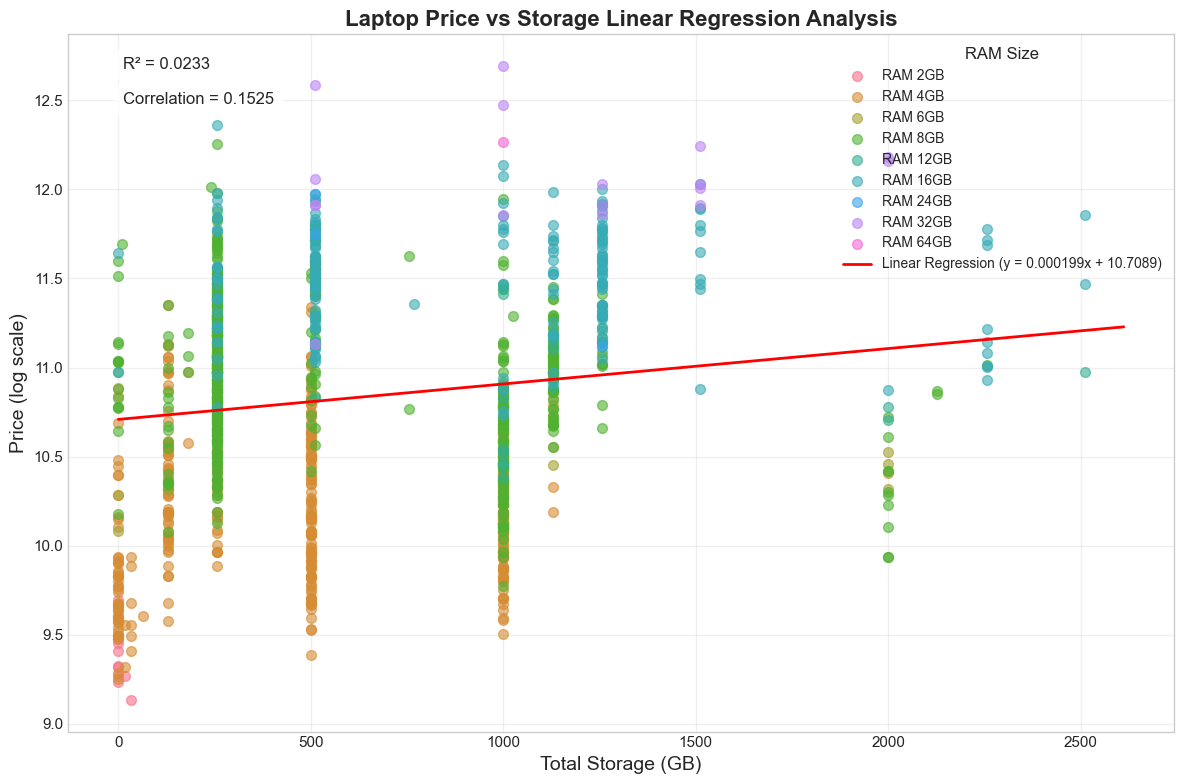

Number of Laptops: 1273
Regression Equation: Price = 0.000199 × Storage + 10.7089
R² Value: 0.0233 (2.33%)
Correlation Coefficient: 0.1525
Interpretation: Storage capacity has a very weak relationship with laptop price.


In [18]:
# lINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read the data
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a scatter plot with different colors for different RAM sizes
ram_groups = df['Ram'].unique()
colors = sns.color_palette('husl', len(ram_groups))

for i, ram in enumerate(sorted(ram_groups)):
    subset = df[df['Ram'] == ram]
    plt.scatter(subset['TotalStorage'], subset['Price'], 
                alpha=0.6, label=f'RAM {int(ram)}GB', 
                color=colors[i], s=50)

# Fit linear regression model
X = df[['TotalStorage']]
y = df['Price']
model = LinearRegression()
model.fit(X, y)

# Generate prediction line
x_range = np.linspace(0, df['TotalStorage'].max() + 100, 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Add the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2, 
         label=f'Linear Regression (y = {model.coef_[0]:.6f}x + {model.intercept_:.4f})')

# Add annotations
r2 = r2_score(y, model.predict(X))
plt.annotate(f'R² = {r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

correlation = np.corrcoef(df['TotalStorage'], df['Price'])[0, 1]
plt.annotate(f'Correlation = {correlation:.4f}', xy=(0.05, 0.9), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Add labels and title
plt.xlabel('Total Storage (GB)', fontsize=14)
plt.ylabel('Price (log scale)', fontsize=14)
plt.title('Laptop Price vs Storage Linear Regression Analysis', fontsize=16, fontweight='bold')
plt.legend(title='RAM Size', title_fontsize=12, fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)

# Add some additional styling
plt.tight_layout()

# Show the plot
plt.show()

# Print regression statistics
print(f"Number of Laptops: {len(df)}")
print(f"Regression Equation: Price = {model.coef_[0]:.6f} × Storage + {model.intercept_:.4f}")
print(f"R² Value: {r2:.4f} ({r2 * 100:.2f}%)")
print(f"Correlation Coefficient: {correlation:.4f}")

# Add interpretation of results
if r2 < 0.1:
    print("Interpretation: Storage capacity has a very weak relationship with laptop price.")
elif r2 < 0.3:
    print("Interpretation: Storage capacity has a weak relationship with laptop price.")
else:
    print("Interpretation: Storage capacity has a moderate relationship with laptop price.")

Dataset shape: (1273, 14)

Columns: ['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'TotalStorage', 'Gpu_brand', 'Os']

Sample data:
  Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD  TotalStorage Gpu_brand      Os  
0  Intel Core i5    0  128           128     Intel     Mac  
1  Intel Core i5    0    0             0     Intel     Mac  
2  Intel Core i5    0  256           256     Intel  Others  
3  Intel Core i7    0  512           512       AMD     Mac  
4  Intel Core i5    0  256         

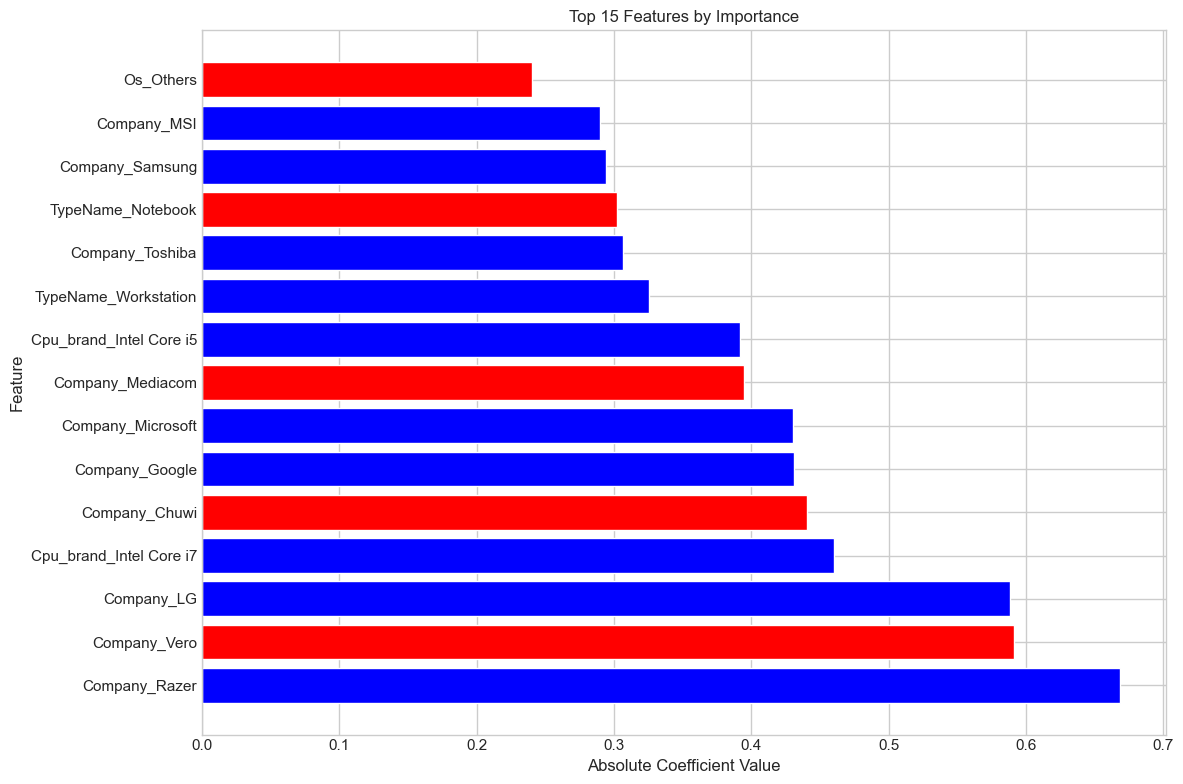

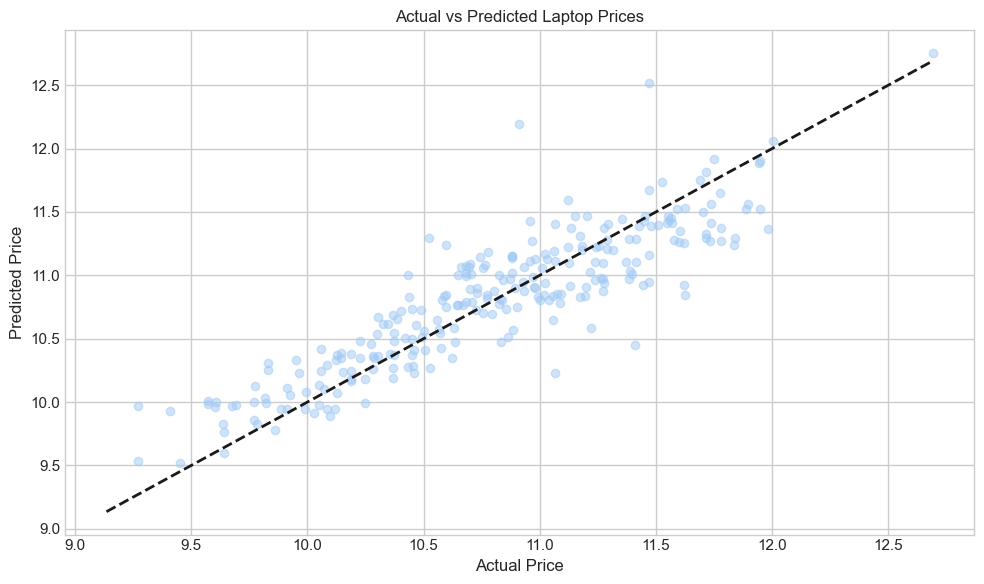

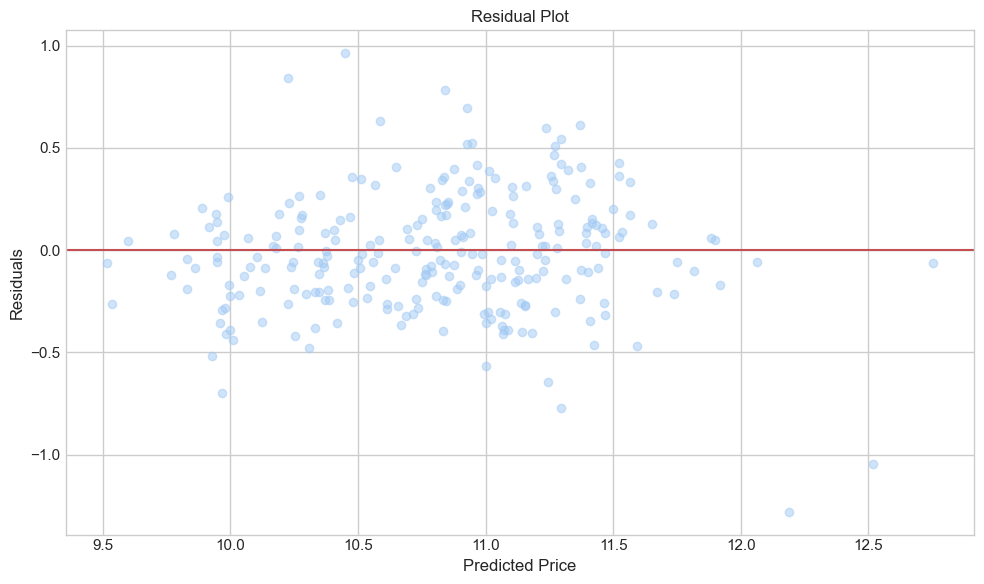

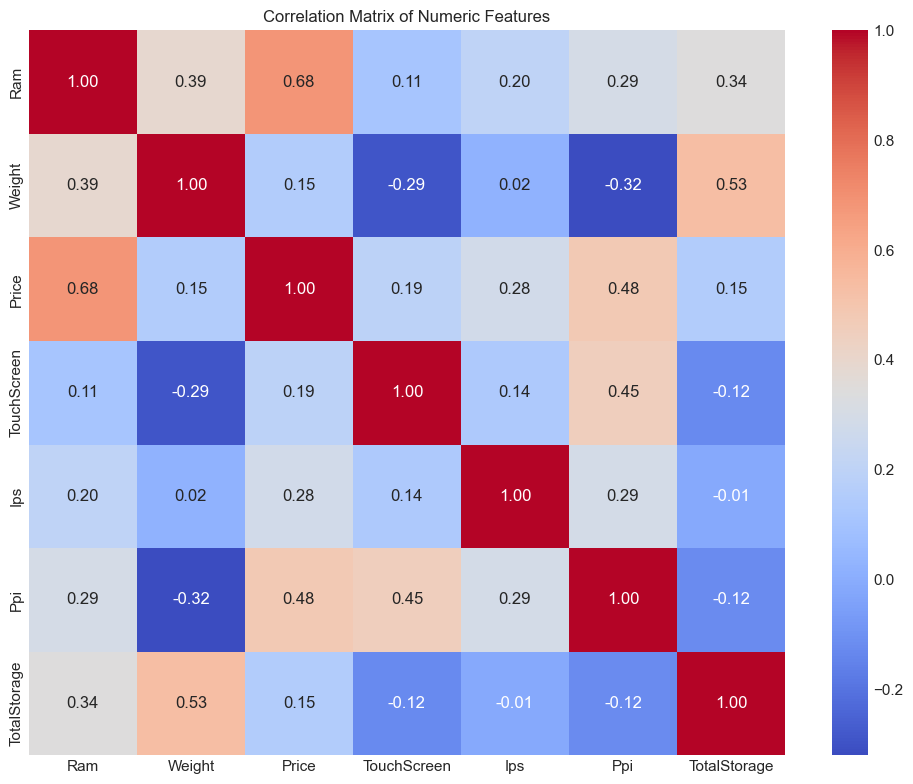

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Read the data
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample data:")
print(df.head())

# Drop SSD and HDD columns as we'll use TotalStorage instead
df_model = df.drop(['SSD', 'HDD'], axis=1)

# Check for missing values
print("\nMissing values per column:")
print(df_model.isnull().sum())

# Prepare categorical features for modeling
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numeric_features = ['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_model[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Combine with numeric features
X_numeric = df_model[numeric_features].drop('Price', axis=1)  # Price is the target
X_encoded = pd.concat([X_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Prepare target variable
y = df_model['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance (top 15)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['blue' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Abs_Coefficient'], color=colors)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Features by Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residuals.png')

# Check the coefficient for TotalStorage specifically
total_storage_coef = feature_importance[feature_importance['Feature'] == 'TotalStorage']['Coefficient'].values[0]
print(f"\nTotalStorage Coefficient: {total_storage_coef:.6f}")

# Create the regression formula
intercept = model.intercept_
formula = f"Price = {intercept:.4f}"
for feature, coef in zip(X_encoded.columns, model.coef_):
    if abs(coef) > 0.001:  # Only include significant coefficients for readability
        formula += f" + ({coef:.4f} × {feature})"

print("\nRegression Formula (simplified):")
print(formula)

# Create a correlation matrix of numeric features
plt.figure(figsize=(10, 8))
corr_matrix = df_model[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Print analysis and interpretation
print("\nAnalysis and Interpretation:")
print(f"1. The multiple linear regression model achieved an R² of {test_r2:.4f} on the test set,")
print("   which means it explains about {:.1f}% of the variance in laptop prices.".format(test_r2 * 100))
print(f"2. The RMSE on the test set is {test_rmse:.4f}, indicating the average prediction error.")
print("3. Key factors influencing laptop prices:")

for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']}: coefficient = {row['Coefficient']:.4f}")

print(f"4. TotalStorage has a coefficient of {total_storage_coef:.6f}, indicating")
if total_storage_coef > 0:
    print("   a positive relationship with price when controlling for other variables.")
else:
    print("   a negative relationship with price when controlling for other variables.")

plt.show()

IndexError: list index out of range

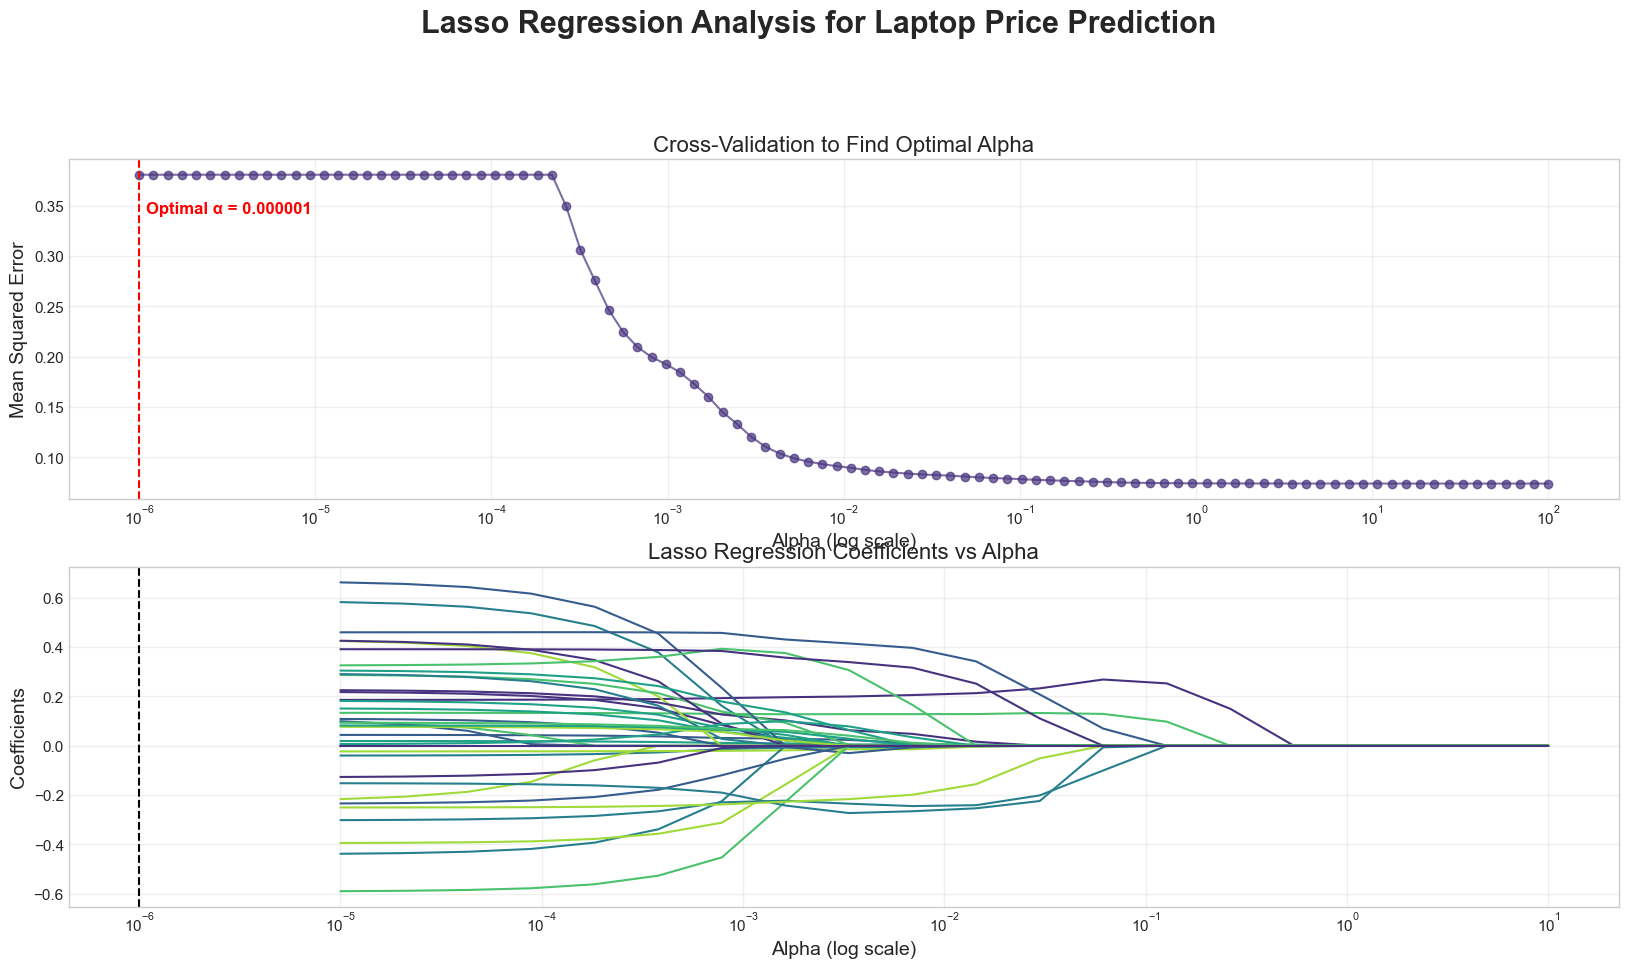

In [20]:
# Lasso Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['font.size'] = 12

# Read the data
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Remove SSD and HDD as we'll use TotalStorage
df_model = df.drop(['SSD', 'HDD'], axis=1)

# Define features
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numeric_features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']
target = 'Price'

# Create figure with subplots
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Lasso Regression Analysis for Laptop Price Prediction', fontsize=22, fontweight='bold')

# Prepare the data
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Create preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get feature names after preprocessing
preprocessor.fit(X)
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Transform data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 1. Determine optimal alpha using cross-validation
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=1)

# Use LassoCV to find optimal alpha
alphas = np.logspace(-6, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_processed, y_train)
optimal_alpha = lasso_cv.alpha_

# Plot MSE for different alphas
mse = np.mean(lasso_cv.mse_path_, axis=1)
ax1.semilogx(alphas, mse, marker='o', linestyle='-', alpha=0.7)
ax1.axvline(optimal_alpha, color='red', linestyle='--')
ax1.text(optimal_alpha*1.1, np.max(mse)*0.9, f'Optimal α = {optimal_alpha:.6f}', 
         color='red', fontweight='bold')
ax1.set_xlabel('Alpha (log scale)', fontsize=14)
ax1.set_ylabel('Mean Squared Error', fontsize=14)
ax1.set_title('Cross-Validation to Find Optimal Alpha', fontsize=16)
ax1.grid(True, alpha=0.3)

# 2. Plot feature coefficients for different alpha values
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=2, rowspan=1)

# Compute Lasso path
alphas_path = np.logspace(-5, 1, 20)
coefs = []

for alpha in alphas_path:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_processed, y_train)
    coefs.append(lasso.coef_)

# Plot coefficients vs alpha
ax2.set_xscale('log')
for i, feature in enumerate(feature_names):
    ax2.plot(alphas_path, [coef[i] for coef in coefs], label=feature if i < 10 else '')

ax2.axvline(optimal_alpha, color='black', linestyle='--')
ax2.set_xlabel('Alpha (log scale)', fontsize=14)
ax2.set_ylabel('Coefficients', fontsize=14)
ax2.set_title('Lasso Regression Coefficients vs Alpha', fontsize=16)
ax2.grid(True, alpha=0.3)

# Only show legend for top 10 features for readability
handles, labels = ax2.get_legend_handles_labels()
top_indices = np.argsort([abs(coefs[-1][i]) for i in range(len(feature_names))])[-10:]
ax2.legend([handles[i] for i in top_indices], [labels[i] for i in top_indices], 
           loc='center left', bbox_to_anchor=(1, 0.5))

# 3. Train final Lasso model with optimal alpha
lasso = Lasso(alpha=optimal_alpha, max_iter=10000, random_state=42)
lasso.fit(X_train_processed, y_train)
y_pred = lasso.predict(X_test_processed)

# Plot actual vs predicted
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1)
ax3.scatter(y_test, y_pred, alpha=0.5)
ax3.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax3.set_xlabel('Actual Price', fontsize=14)
ax3.set_ylabel('Predicted Price', fontsize=14)
ax3.set_title('Actual vs Predicted Prices', fontsize=16)

# Calculate metrics
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

ax3.annotate(f'Test R² = {test_r2:.4f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax3.annotate(f'Test RMSE = {test_rmse:.4f}', 
             xy=(0.05, 0.88), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax3.grid(True, alpha=0.3)

# 4. Top coefficients bar plot
ax4 = plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)

# Get non-zero coefficients
coef = lasso.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values('Coefficient', key=abs, ascending=False)

# Plot top 15 coefficients or all if less than 15
num_to_plot = min(15, len(coef_df))
top_coef = coef_df.head(num_to_plot)
colors = ['blue' if x > 0 else 'red' for x in top_coef['Coefficient']]

# Highlight TotalStorage if present
if 'TotalStorage' in top_coef['Feature'].values:
    idx = top_coef[top_coef['Feature'] == 'TotalStorage'].index[0]
    colors[top_coef.index.get_loc(idx)] = 'green'

ax4.barh(top_coef['Feature'], top_coef['Coefficient'], color=colors)
ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax4.set_xlabel('Coefficient Value', fontsize=14)
ax4.set_title(f'Top {num_to_plot} Lasso Coefficients (α = {optimal_alpha:.6f})', fontsize=16)
ax4.grid(True, alpha=0.3)

# Number of features selected by Lasso
num_selected = np.sum(coef != 0)
total_features = len(feature_names)

# Add summary
plt.figtext(0.5, 0.02, 
            f"Summary: Lasso regression with optimal α = {optimal_alpha:.6f} achieved R² = {test_r2:.4f} on test data.\n"
            f"The model selected {num_selected} out of {total_features} features ({num_selected/total_features*100:.1f}%).\n"
            f"TotalStorage coefficient: {coef_df.loc[coef_df['Feature'] == 'TotalStorage', 'Coefficient'].values[0] if 'TotalStorage' in coef_df['Feature'].values else 0:.6f}",
            ha='center', fontsize=14, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('laptop_lasso_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# Print model summary
print("\n===== LASSO REGRESSION MODEL SUMMARY =====")
print(f"Optimal Alpha: {optimal_alpha:.6f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"\nFeature Selection: {num_selected} out of {total_features} features selected ({num_selected/total_features*100:.1f}%)")

print("\nTop 10 Most Important Features (Non-Zero Coefficients):")
for i, row in coef_df.head(10).iterrows():
    print(f"- {row['Feature']}: {row['Coefficient']:.6f}")

# Check TotalStorage specifically
if 'TotalStorage' in coef_df['Feature'].values:
    ts_coef = coef_df.loc[coef_df['Feature'] == 'TotalStorage', 'Coefficient'].values[0]
    ts_rank = coef_df[coef_df['Feature'] == 'TotalStorage'].index[0] + 1
    print(f"\nTotalStorage Coefficient: {ts_coef:.6f} (Rank #{ts_rank} out of {num_selected} selected features)")
else:
    print("\nTotalStorage was not selected by the Lasso model (coefficient = 0)")

IndexError: GridSpec slice would result in no space allocated for subplot

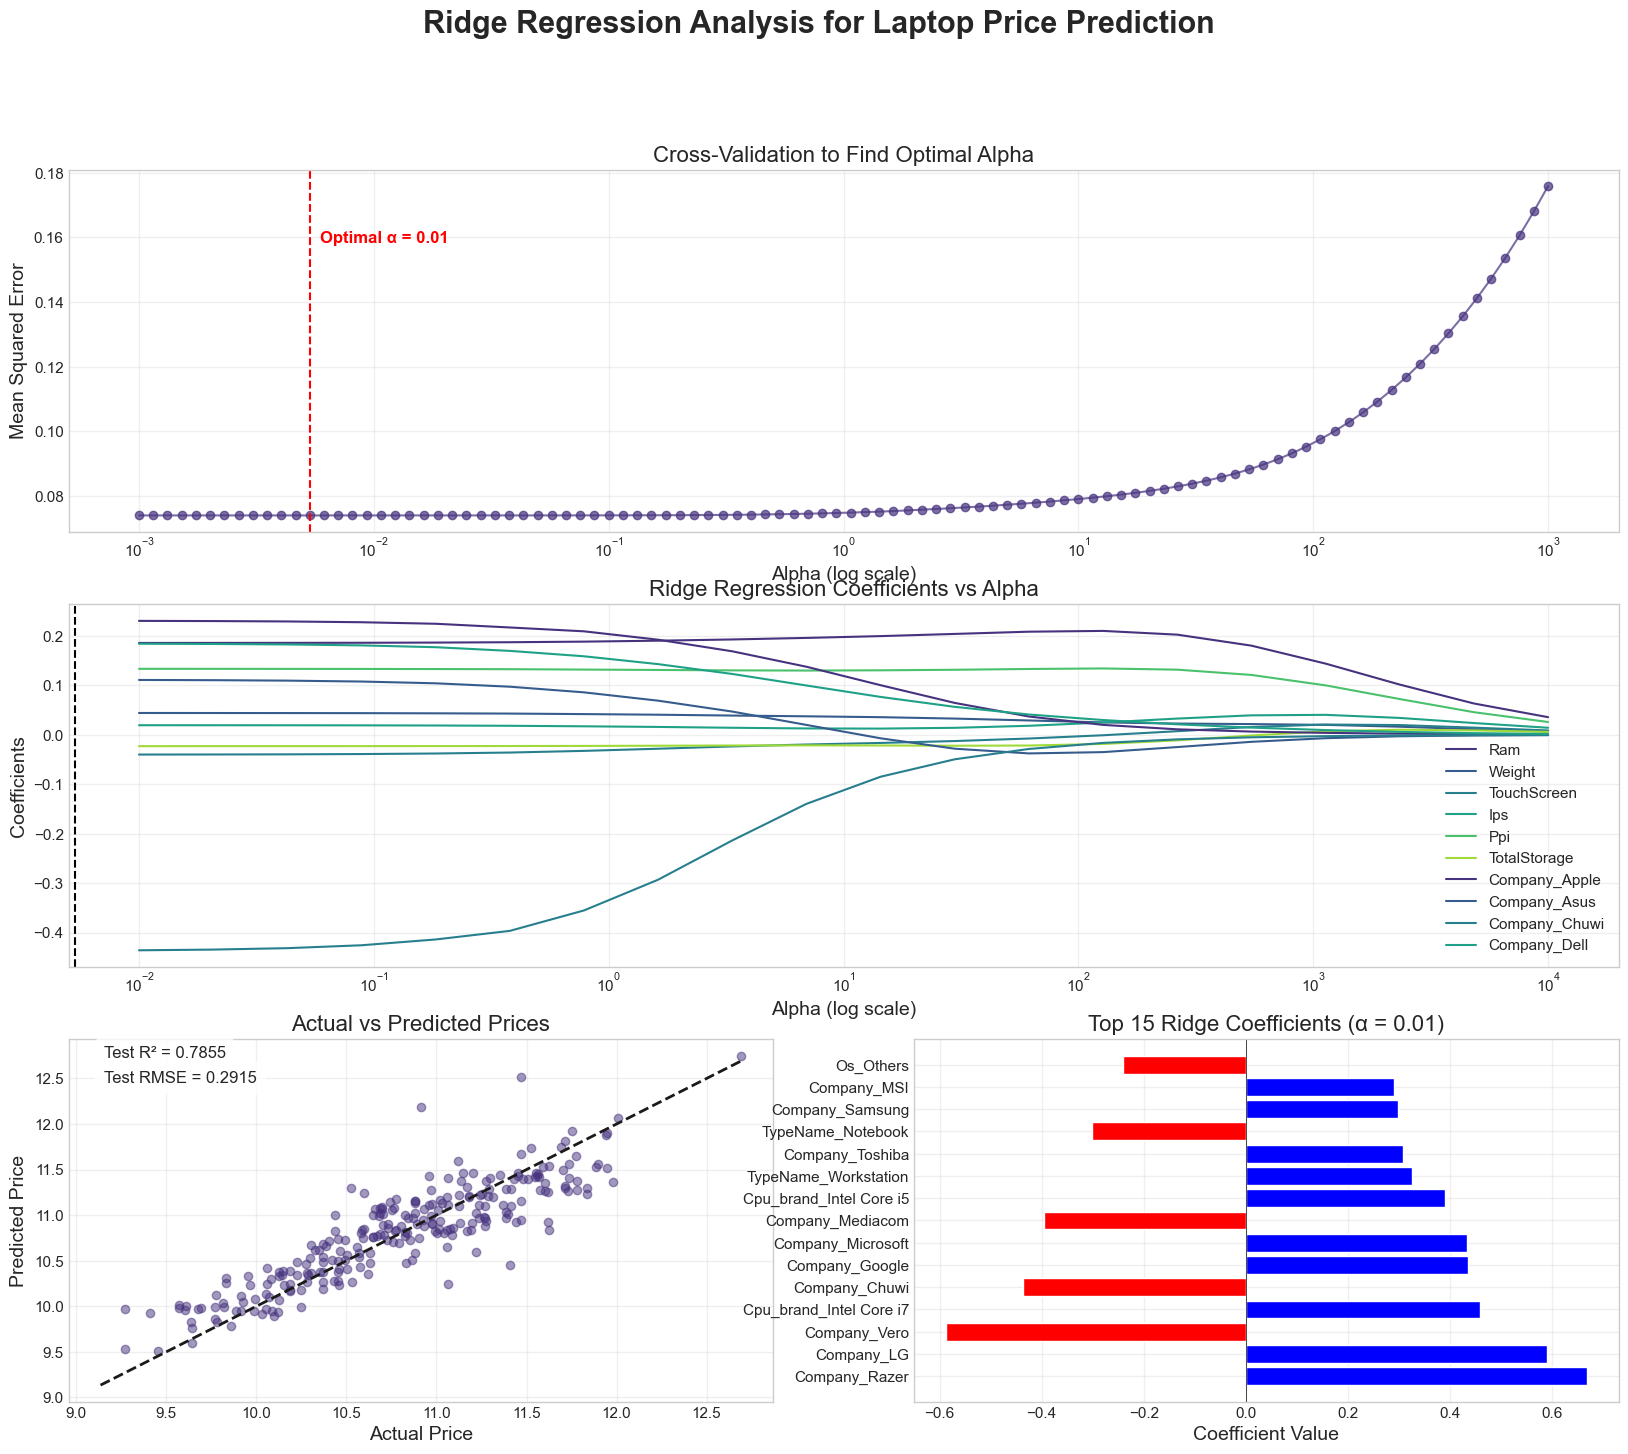

In [21]:
# Ridge Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['font.size'] = 12

# Read the data
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Remove SSD and HDD as we'll use TotalStorage
df_model = df.drop(['SSD', 'HDD'], axis=1)

# Define features
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numeric_features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']
target = 'Price'

# Create figure with subplots
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Ridge Regression Analysis for Laptop Price Prediction', fontsize=22, fontweight='bold')

# Prepare the data
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Create preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get feature names after preprocessing
preprocessor.fit(X)
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Transform data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 1. Determine optimal alpha using cross-validation
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=1)

# Use RidgeCV to find optimal alpha
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_processed, y_train)
optimal_alpha = ridge_cv.alpha_

# Calculate scores for different alphas
cv_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    scores = cross_val_score(ridge, X_train_processed, y_train, 
                             cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Plot MSE for different alphas
ax1.semilogx(alphas, -np.array(cv_scores), marker='o', linestyle='-', alpha=0.7)
ax1.axvline(optimal_alpha, color='red', linestyle='--')
ax1.text(optimal_alpha*1.1, -np.min(cv_scores)*0.9, f'Optimal α = {optimal_alpha:.2f}', 
         color='red', fontweight='bold')
ax1.set_xlabel('Alpha (log scale)', fontsize=14)
ax1.set_ylabel('Mean Squared Error', fontsize=14)
ax1.set_title('Cross-Validation to Find Optimal Alpha', fontsize=16)
ax1.grid(True, alpha=0.3)

# 2. Plot coefficient changes for different alpha values
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=2, rowspan=1)

# Compute Ridge path
alphas_path = np.logspace(-2, 4, 20)
coefs = []

for alpha in alphas_path:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_processed, y_train)
    coefs.append(ridge.coef_)

# Plot coefficients vs alpha
ax2.set_xscale('log')
for i, feature in enumerate(feature_names):
    if i < 10:  # Plot only top features for clarity
        ax2.plot(alphas_path, [coef[i] for coef in coefs], label=feature)

ax2.axvline(optimal_alpha, color='black', linestyle='--')
ax2.set_xlabel('Alpha (log scale)', fontsize=14)
ax2.set_ylabel('Coefficients', fontsize=14)
ax2.set_title('Ridge Regression Coefficients vs Alpha', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')

# 3. Train final Ridge model with optimal alpha
ridge = Ridge(alpha=optimal_alpha, random_state=42)
ridge.fit(X_train_processed, y_train)
y_pred = ridge.predict(X_test_processed)

# Plot actual vs predicted
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1)
ax3.scatter(y_test, y_pred, alpha=0.5)
ax3.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax3.set_xlabel('Actual Price', fontsize=14)
ax3.set_ylabel('Predicted Price', fontsize=14)
ax3.set_title('Actual vs Predicted Prices', fontsize=16)

# Calculate metrics
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

ax3.annotate(f'Test R² = {test_r2:.4f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax3.annotate(f'Test RMSE = {test_rmse:.4f}', 
             xy=(0.05, 0.88), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax3.grid(True, alpha=0.3)

# 4. Top coefficients bar plot
ax4 = plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)

# Get coefficients
coef = ridge.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

# Plot top 15 coefficients
top_coef = coef_df.head(15)
colors = ['blue' if x > 0 else 'red' for x in top_coef['Coefficient']]

# Highlight TotalStorage if present
if 'TotalStorage' in top_coef['Feature'].values:
    idx = top_coef[top_coef['Feature'] == 'TotalStorage'].index[0]
    colors[top_coef.index.get_loc(idx)] = 'green'

ax4.barh(top_coef['Feature'], top_coef['Coefficient'], color=colors)
ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax4.set_xlabel('Coefficient Value', fontsize=14)
ax4.set_title(f'Top 15 Ridge Coefficients (α = {optimal_alpha:.2f})', fontsize=16)
ax4.grid(True, alpha=0.3)

# 5. Residual plot
ax5 = plt.subplot2grid((3, 2), (3, 0), colspan=1, rowspan=1)
residuals = y_test - y_pred
ax5.scatter(y_pred, residuals, alpha=0.5)
ax5.axhline(y=0, color='red', linestyle='--')
ax5.set_xlabel('Predicted Price', fontsize=14)
ax5.set_ylabel('Residuals', fontsize=14)
ax5.set_title('Residual Plot', fontsize=16)
ax5.grid(True, alpha=0.3)

# 6. Feature importance
ax6 = plt.subplot2grid((3, 2), (3, 1), colspan=1, rowspan=1)

# Calculate standardized coefficients for importance
std_coef = np.abs(coef) / np.sum(np.abs(coef))
coef_df['Importance'] = std_coef
coef_df = coef_df.sort_values('Importance', ascending=False)

# Plot as pie chart for top features
top_importance = coef_df.head(8)
others_importance = 1 - top_importance['Importance'].sum()
if others_importance > 0:
    top_importance = pd.concat([
        top_importance, 
        pd.DataFrame([{'Feature': 'Others', 'Importance': others_importance}])
    ])

colors = plt.cm.viridis(np.linspace(0, 1, len(top_importance)))
if 'TotalStorage' in top_importance['Feature'].values:
    idx = top_importance[top_importance['Feature'] == 'TotalStorage'].index[0]
    colors[top_importance.index.get_loc(idx)] = [0.2, 0.8, 0.2, 1.0]  # Green

ax6.pie(top_importance['Importance'], labels=top_importance['Feature'], 
        autopct='%1.1f%%', startangle=90, colors=colors)
ax6.set_title('Relative Feature Importance', fontsize=16)

# Find TotalStorage coefficient and importance
ts_coef = coef_df.loc[coef_df['Feature'] == 'TotalStorage', 'Coefficient'].values[0]
ts_importance = coef_df.loc[coef_df['Feature'] == 'TotalStorage', 'Importance'].values[0]
ts_rank = coef_df[coef_df['Feature'] == 'TotalStorage'].index[0] + 1

# Add summary
plt.figtext(0.5, 0.02, 
            f"Summary: Ridge regression with optimal α = {optimal_alpha:.2f} achieved R² = {test_r2:.4f} on test data.\n"
            f"TotalStorage coefficient: {ts_coef:.6f} (ranked #{ts_rank} out of {len(feature_names)} features, "
            f"accounting for {ts_importance*100:.2f}% of feature importance).\n"
            f"Unlike Lasso, Ridge regression keeps all features but shrinks their coefficients, "
            f"making it effective for handling multicollinearity.",
            ha='center', fontsize=14, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('laptop_ridge_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# Print model summary
print("\n===== RIDGE REGRESSION MODEL SUMMARY =====")
print(f"Optimal Alpha: {optimal_alpha:.2f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print("\nTop 10 Most Important Features:")
for i, row in coef_df.head(10).iterrows():
    print(f"- {row['Feature']}: coef = {row['Coefficient']:.6f}, importance = {row['Importance']*100:.2f}%")

print(f"\nTotalStorage Statistics:")
print(f"- Coefficient: {ts_coef:.6f}")
print(f"- Importance: {ts_importance*100:.2f}%")
print(f"- Rank: #{ts_rank} out of {len(feature_names)} features")

# Compare with simple linear regression using only TotalStorage
from sklearn.linear_model import LinearRegression
X_simple = X_train[['TotalStorage']]
X_simple_test = X_test[['TotalStorage']]
simple_model = LinearRegression().fit(X_simple, y_train)
simple_pred = simple_model.predict(X_simple_test)
simple_r2 = r2_score(y_test, simple_pred)
simple_rmse = np.sqrt(mean_squared_error(y_test, simple_pred))

print(f"\nComparison with Simple Linear Regression (TotalStorage only):")
print(f"- Simple Model R²: {simple_r2:.4f}")
print(f"- Simple Model RMSE: {simple_rmse:.4f}")
print(f"- Improvement with Ridge: {(test_r2-simple_r2)/simple_r2*100:.2f}% better R²")

print("\nConclusion:")
if abs(ts_coef) > 0.01:
    print(f"TotalStorage has a {'positive' if ts_coef > 0 else 'negative'} and significant effect on laptop price.")
else:
    print(f"TotalStorage has a relatively small effect on laptop price when controlling for other variables.")
print(f"The overall model explains {test_r2*100:.1f}% of the variance in laptop prices, which is")
print(f"{(test_r2-simple_r2)/simple_r2*100:.2f}% better than using TotalStorage alone.")

Loading and preparing data...
Starting grid search for optimal alpha...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Grid search completed in 3.68 seconds
Best Alpha: 0.001
Best Cross-Validation MSE: 0.074009
Best Cross-Validation RMSE: 0.272046

Training final model with best alpha...
Final Model Test R²: 0.7854
Final Model Test RMSE: 0.2915

Top 10 Features by Absolute Coefficient Value:
                    Feature  Coefficient  Abs_Coefficient
19            Company_Razer     0.668315         0.668315
14               Company_LG     0.590006         0.590006
22             Company_Vero    -0.587787         0.587787
31  Cpu_brand_Intel Core i7     0.458214         0.458214
8             Company_Chuwi    -0.437033         0.437033
11           Company_Google     0.435498         0.435498
18        Company_Microsoft     0.433654         0.433654
17         Company_Mediacom    -0.395417         0.395417
30  Cpu_brand_Intel Core i5     0.389527         0.389527
28     Typ

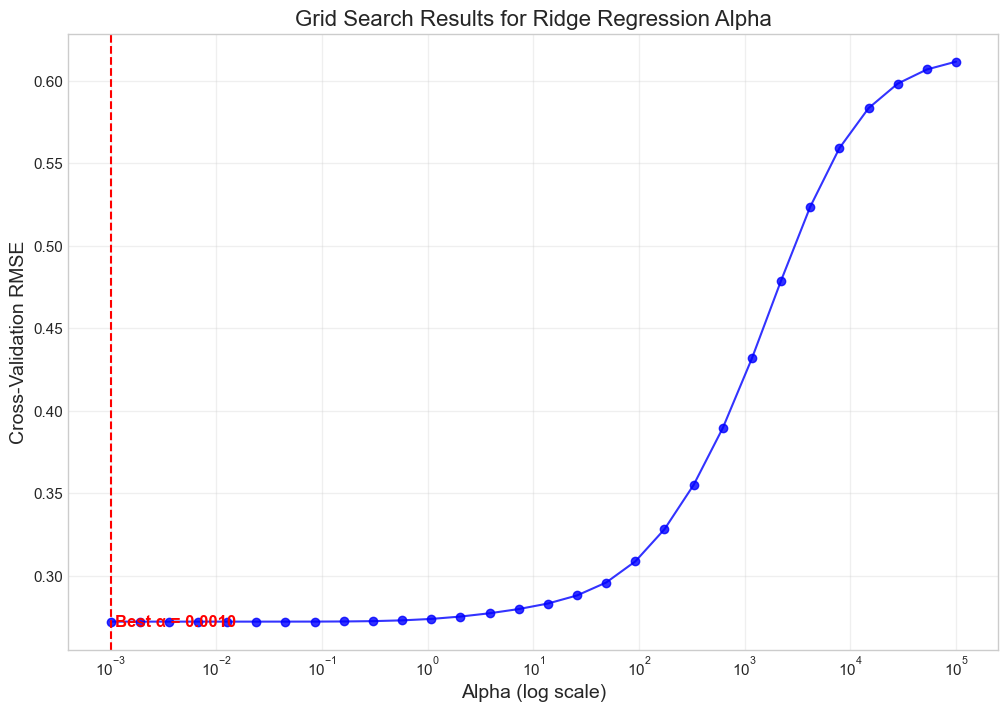

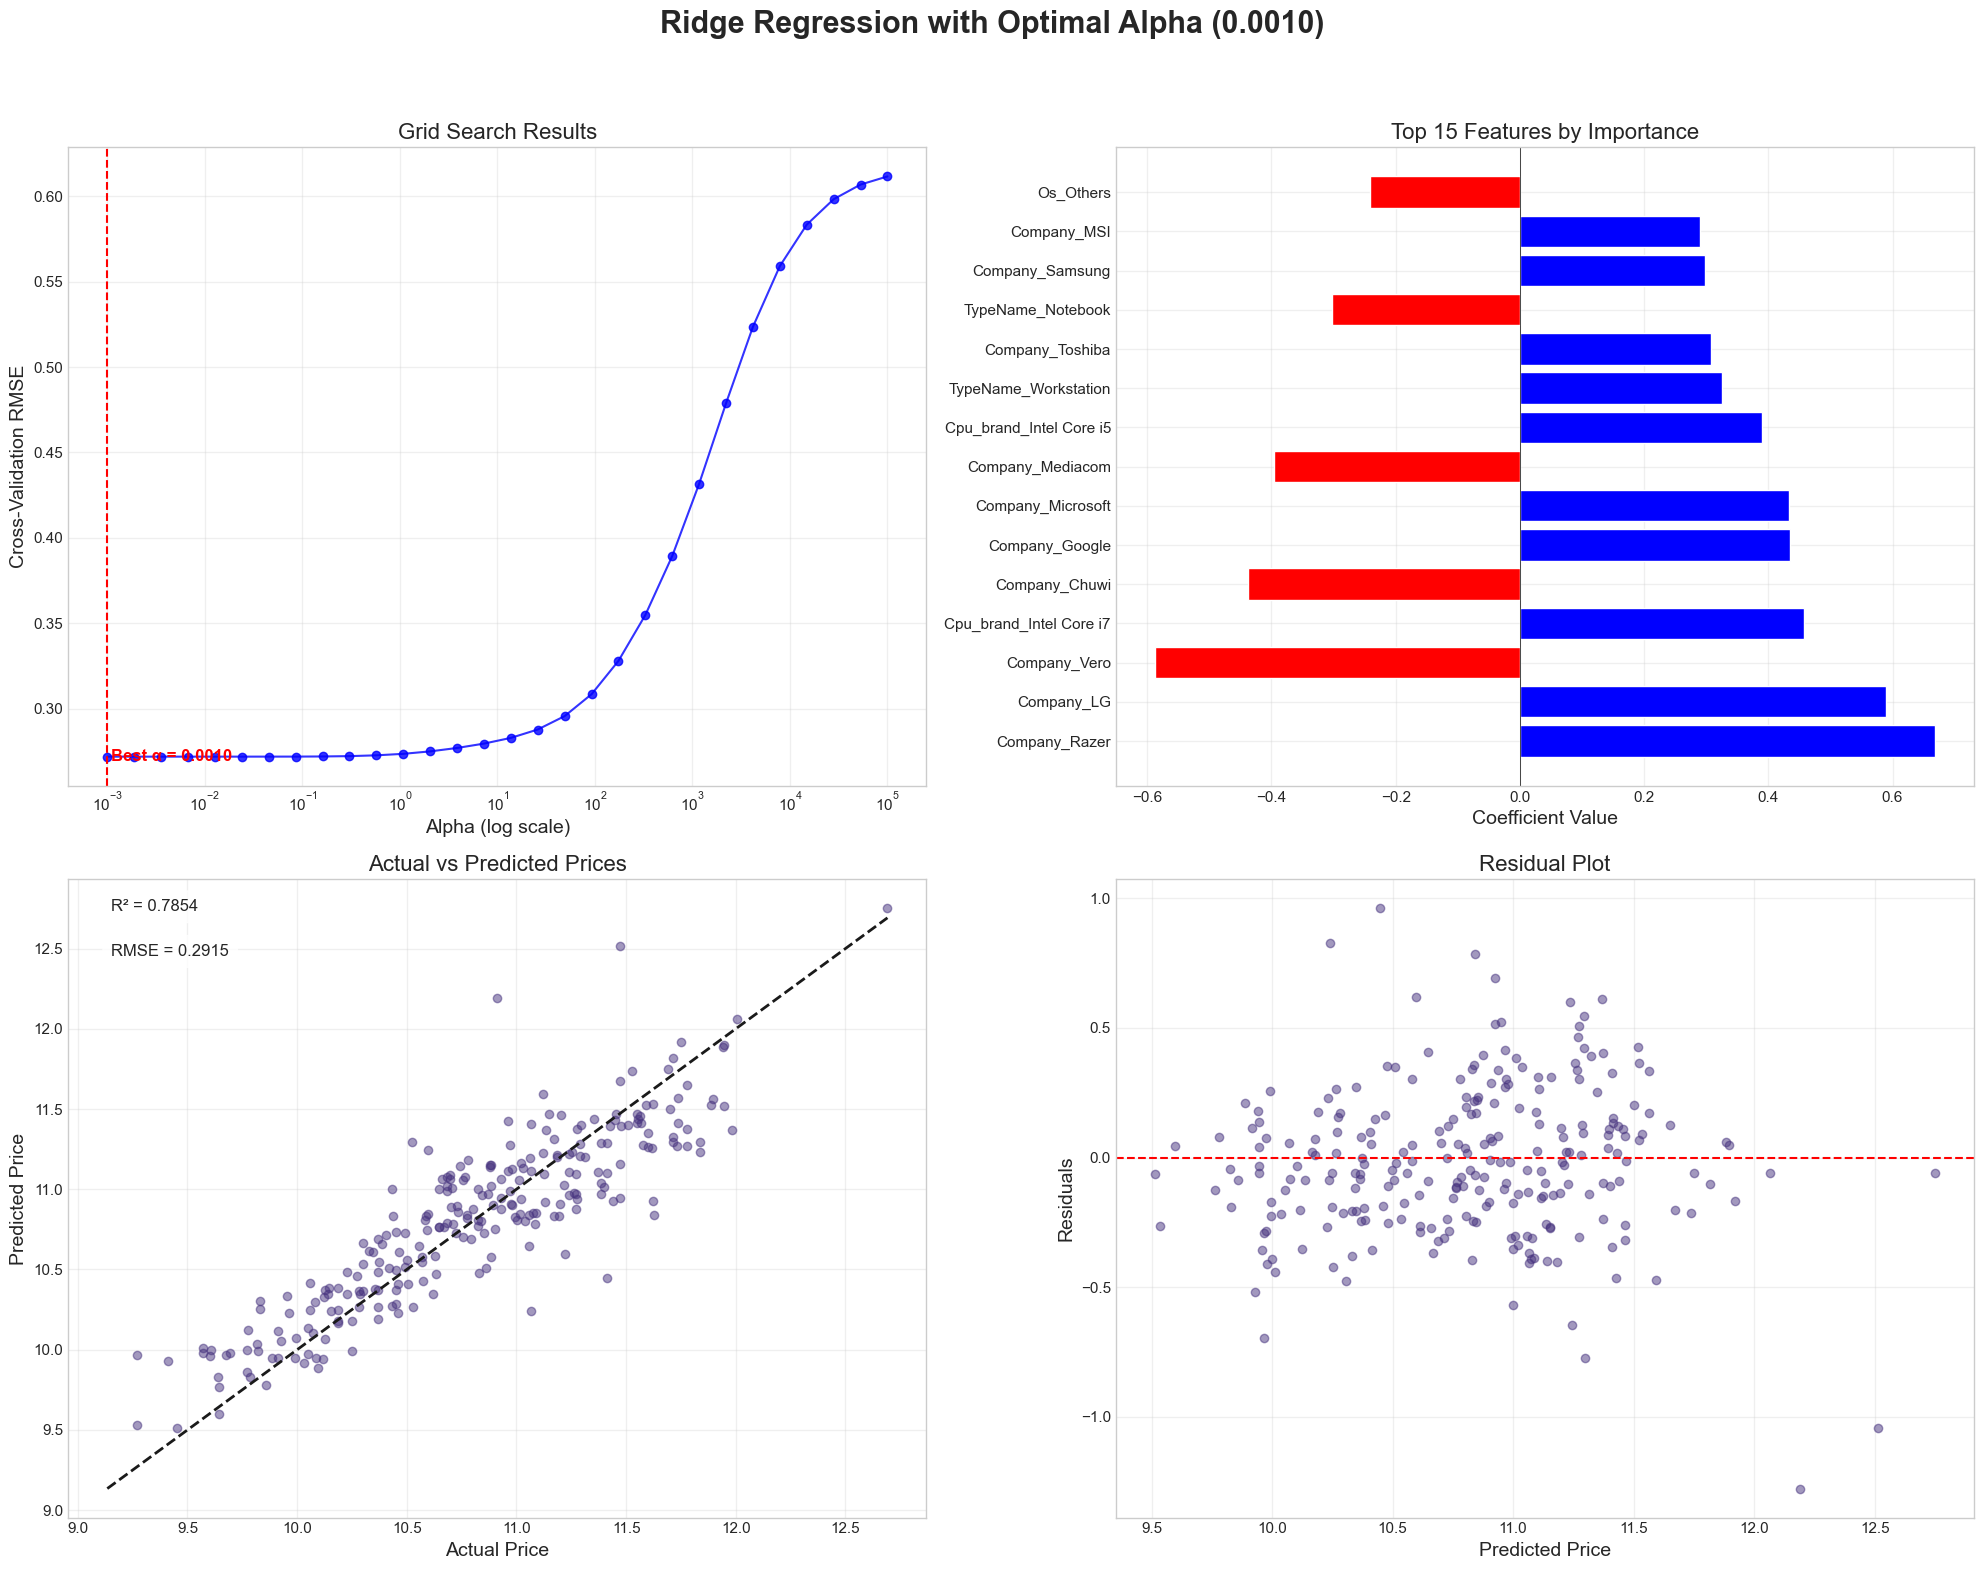


===== MODEL COMPARISON =====
Simple Linear Regression (TotalStorage only):
  R² = 0.0373
  RMSE = 0.6175

Standard Linear Regression (all features):
  R² = 0.7849
  RMSE = 0.2919

Ridge Regression (alpha = 0.0010):
  R² = 0.7854
  RMSE = 0.2915

Ridge improvement over simple model: 2002.99% in R²
Ridge improvement over standard linear regression: 0.07% in R²

===== FINAL CONCLUSION =====
The grid search identified an optimal alpha of 0.0010 for the Ridge regression model.
This model explains 78.54% of the variance in laptop prices.
Ridge regression provided a slight improvement over standard linear regression,
suggesting some benefit from regularization.

Regarding TotalStorage:
- Coefficient in Ridge model: -0.022549
- Ranked #6 out of 37 features by importance
- TotalStorage has a negative and significant effect on laptop price.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['font.size'] = 12

print("Loading and preparing data...")
# Read the data
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Remove SSD and HDD as we'll use TotalStorage
df_model = df.drop(['SSD', 'HDD'], axis=1)

# Define features
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numeric_features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']
target = 'Price'

# Prepare the data
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessing and Ridge regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Create parameter grid for GridSearchCV
# Use a wide range of alpha values on logarithmic scale
param_grid = {
    'regressor__alpha': np.logspace(-3, 5, 30)  # 30 values from 0.001 to 100000
}

print("Starting grid search for optimal alpha...")
start_time = time.time()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Time taken
time_taken = time.time() - start_time
print(f"Grid search completed in {time_taken:.2f} seconds")

# Get the best parameters and score
best_alpha = grid_search.best_params_['regressor__alpha']
best_score = -grid_search.best_score_  # Convert negative MSE back to positive
print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation MSE: {best_score:.6f}")
print(f"Best Cross-Validation RMSE: {np.sqrt(best_score):.6f}")

# Get the results of the grid search
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['mean_test_score'] = -cv_results['mean_test_score']  # Convert negative MSE back to positive
cv_results['mean_test_rmse'] = np.sqrt(cv_results['mean_test_score'])

# Plot the grid search results
plt.figure(figsize=(12, 8))
plt.semilogx(cv_results['param_regressor__alpha'], 
             cv_results['mean_test_rmse'], 
             marker='o', linestyle='-', color='blue', alpha=0.8)
plt.axvline(best_alpha, color='red', linestyle='--')
plt.text(best_alpha*1.1, np.min(cv_results['mean_test_rmse'])*0.99, 
         f'Best α = {best_alpha:.4f}', color='red', fontweight='bold')
plt.xlabel('Alpha (log scale)', fontsize=14)
plt.ylabel('Cross-Validation RMSE', fontsize=14)
plt.title('Grid Search Results for Ridge Regression Alpha', fontsize=16)
plt.grid(True, alpha=0.3)
plt.savefig('ridge_grid_search_results.png', dpi=300, bbox_inches='tight')

print("\nTraining final model with best alpha...")
# Train the final model with the best alpha
best_ridge = Ridge(alpha=best_alpha, random_state=42)
best_ridge.fit(preprocessor.fit_transform(X_train), y_train)

# Make predictions on test set
X_test_processed = preprocessor.transform(X_test)
y_pred = best_ridge.predict(X_test_processed)

# Calculate final model performance
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Model Test R²: {test_r2:.4f}")
print(f"Final Model Test RMSE: {test_rmse:.4f}")

# Get feature names after preprocessing
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_ridge.coef_
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Features by Absolute Coefficient Value:")
print(coef_df.head(10))

# Check TotalStorage coefficient
ts_coef = coef_df.loc[coef_df['Feature'] == 'TotalStorage', 'Coefficient'].values[0]
ts_rank = coef_df[coef_df['Feature'] == 'TotalStorage'].index[0] + 1
print(f"\nTotalStorage Coefficient: {ts_coef:.6f}")
print(f"TotalStorage Rank: #{ts_rank} out of {len(feature_names)} features")

# Create figure with multiple subplots for comprehensive visualization
plt.figure(figsize=(20, 16))
plt.suptitle(f'Ridge Regression with Optimal Alpha ({best_alpha:.4f})', fontsize=22, fontweight='bold')

# 1. Plot grid search results again
plt.subplot(2, 2, 1)
plt.semilogx(cv_results['param_regressor__alpha'], 
             cv_results['mean_test_rmse'], 
             marker='o', linestyle='-', color='blue', alpha=0.8)
plt.axvline(best_alpha, color='red', linestyle='--')
plt.text(best_alpha*1.1, np.min(cv_results['mean_test_rmse'])*0.99, 
         f'Best α = {best_alpha:.4f}', color='red', fontweight='bold')
plt.xlabel('Alpha (log scale)', fontsize=14)
plt.ylabel('Cross-Validation RMSE', fontsize=14)
plt.title('Grid Search Results', fontsize=16)
plt.grid(True, alpha=0.3)

# 2. Plot top coefficients
plt.subplot(2, 2, 2)
top_coef = coef_df.head(15)
colors = ['blue' if x > 0 else 'red' for x in top_coef['Coefficient']]
# Highlight TotalStorage if present
if 'TotalStorage' in top_coef['Feature'].values:
    idx = top_coef[top_coef['Feature'] == 'TotalStorage'].index[0]
    colors[top_coef.index.get_loc(idx)] = 'green'
    
plt.barh(top_coef['Feature'], top_coef['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Coefficient Value', fontsize=14)
plt.title('Top 15 Features by Importance', fontsize=16)
plt.grid(True, alpha=0.3)

# 3. Plot actual vs predicted values
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.annotate(f'R² = {test_r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.annotate(f'RMSE = {test_rmse:.4f}', xy=(0.05, 0.88), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)

# 4. Plot residuals
plt.subplot(2, 2, 4)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('ridge_optimal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Compare with simple linear regression and standard linear regression
from sklearn.linear_model import LinearRegression

# Simple regression (TotalStorage only)
X_simple = X_train[['TotalStorage']]
X_simple_test = X_test[['TotalStorage']]
simple_model = LinearRegression().fit(X_simple, y_train)
simple_pred = simple_model.predict(X_simple_test)
simple_r2 = r2_score(y_test, simple_pred)
simple_rmse = np.sqrt(mean_squared_error(y_test, simple_pred))

# Standard linear regression (all features)
std_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
std_pipeline.fit(X_train, y_train)
std_pred = std_pipeline.predict(X_test)
std_r2 = r2_score(y_test, std_pred)
std_rmse = np.sqrt(mean_squared_error(y_test, std_pred))

# Print comparison
print("\n===== MODEL COMPARISON =====")
print(f"Simple Linear Regression (TotalStorage only):")
print(f"  R² = {simple_r2:.4f}")
print(f"  RMSE = {simple_rmse:.4f}")
print(f"\nStandard Linear Regression (all features):")
print(f"  R² = {std_r2:.4f}")
print(f"  RMSE = {std_rmse:.4f}")
print(f"\nRidge Regression (alpha = {best_alpha:.4f}):")
print(f"  R² = {test_r2:.4f}")
print(f"  RMSE = {test_rmse:.4f}")

# Improvement percentages
ridge_vs_simple = (test_r2 - simple_r2) / abs(simple_r2) * 100
ridge_vs_std = (test_r2 - std_r2) / abs(std_r2) * 100

print(f"\nRidge improvement over simple model: {ridge_vs_simple:.2f}% in R²")
print(f"Ridge improvement over standard linear regression: {ridge_vs_std:.2f}% in R²")

print("\n===== FINAL CONCLUSION =====")
print(f"The grid search identified an optimal alpha of {best_alpha:.4f} for the Ridge regression model.")
print(f"This model explains {test_r2*100:.2f}% of the variance in laptop prices.")
if ridge_vs_std > 1:
    print(f"Ridge regression provided a significant improvement over standard linear regression,")
    print(f"showing that regularization was beneficial for this dataset.")
elif ridge_vs_std > 0:
    print(f"Ridge regression provided a slight improvement over standard linear regression,")
    print(f"suggesting some benefit from regularization.")
else:
    print(f"Ridge regression did not improve upon standard linear regression,")
    print(f"suggesting that regularization may not be necessary for this dataset.")

print(f"\nRegarding TotalStorage:")
print(f"- Coefficient in Ridge model: {ts_coef:.6f}")
print(f"- Ranked #{ts_rank} out of {len(feature_names)} features by importance")
if abs(ts_coef) > 0.01:
    print(f"- TotalStorage has a {'positive' if ts_coef > 0 else 'negative'} and significant effect on laptop price.")
else:
    print(f"- TotalStorage has a relatively small effect on laptop price when controlling for other variables.")


Features used in model:
Categorical features: ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
Numerical features: ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']

Training set size: 1018 samples
Test set size: 255 samples

Training Random Forest model...

Random Forest Model Performance:
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22
Mean Absolute Error (MAE): 0.17
R² Score: 0.8751

Top 10 most important features:
1. Ram: 0.5790
2. Weight: 0.0756
3. TypeName_Notebook: 0.0716
4. Ppi: 0.0709
5. Cpu_brand_Other Intel Processor: 0.0498
6. Cpu_brand_Intel Core i5: 0.0372
7. TotalStorage: 0.0188
8. Cpu_brand_Intel Core i7: 0.0127
9. TypeName_Workstation: 0.0104
10. Os_Windows: 0.0078

Performing 5-fold cross-validation...
Cross-validation R² scores: [0.82054893 0.88391369 0.87200366 0.82801284 0.83996513]
Mean CV R² score: 0.8489
Standard deviation of CV R² scores: 0.0248


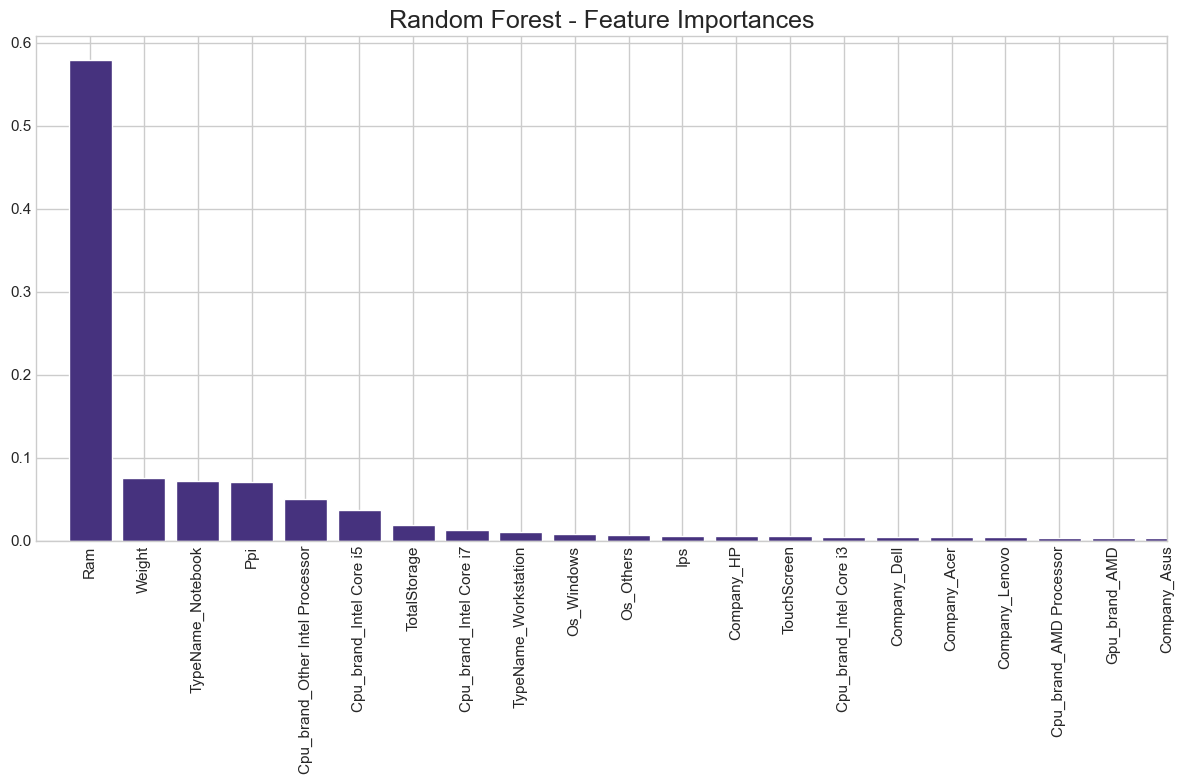

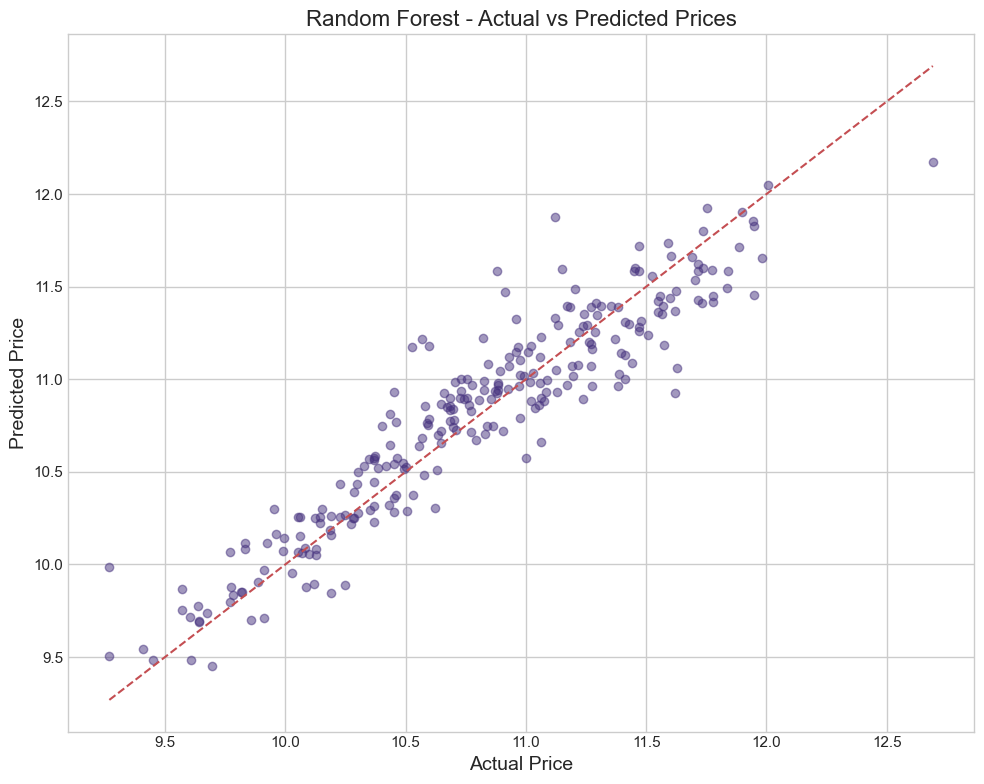

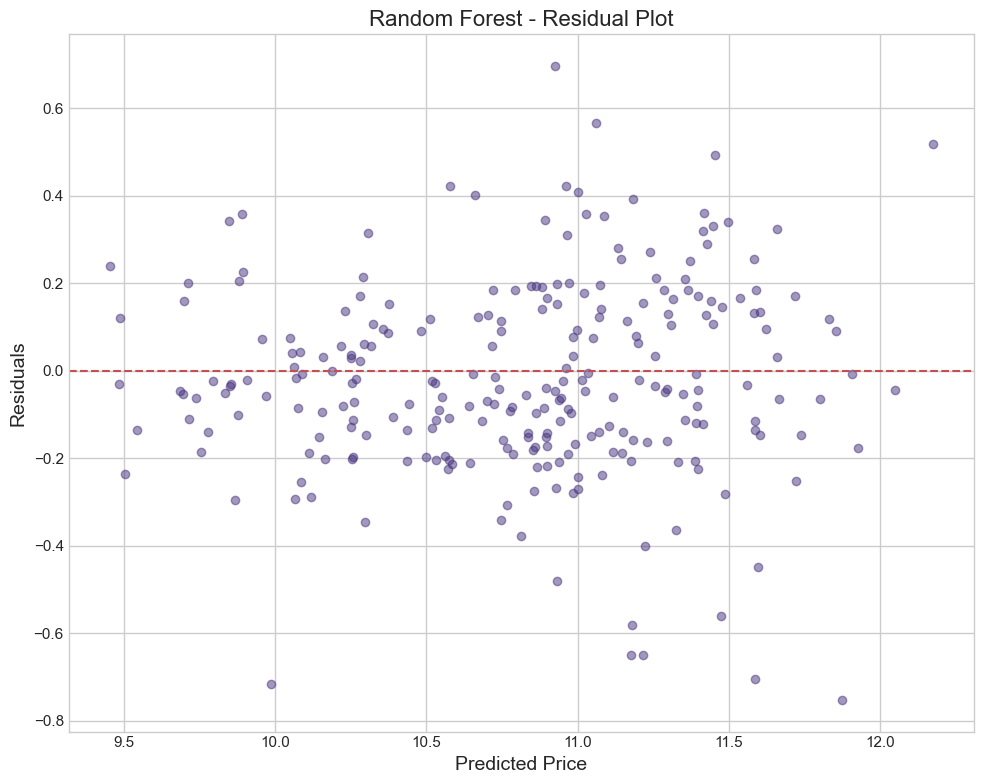

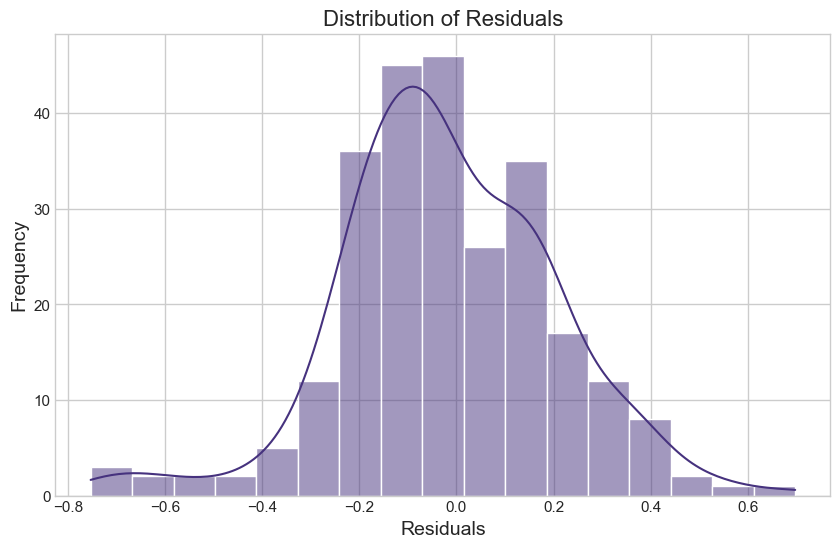

In [24]:
# Random Forest Model using TotalStorage instead of separate SSD and HDD

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('laptop_data_cleaned_pca.csv')


# Separate features and target
# Important: Use TotalStorage and exclude SSD and HDD
X = df.drop(['Price', 'SSD', 'HDD'], axis=1)  # Drop Price (target) and SSD/HDD
y = df['Price']

# Identify categorical and numerical columns
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numerical_cols = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'TotalStorage']  # Only TotalStorage, not SSD/HDD

print("\nFeatures used in model:")
print(f"Categorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Create Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, 
                                        max_depth=15,
                                        min_samples_split=5,
                                        min_samples_leaf=2,
                                        random_state=42))
])

# Train the model
print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nRandom Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Create feature names for importance analysis
feature_names = (
    numerical_cols + 
    list(rf_pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_cols))
)

# Get feature importances
importances = rf_pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Random Forest - Feature Importances', fontsize=18)
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, min(20, len(importances))])  # Show top 20 features or all if less than 20
plt.tight_layout()
plt.savefig('rf_feature_importance_total_storage.png')

# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Random Forest - Actual vs Predicted Prices', fontsize=16)
plt.tight_layout()
plt.savefig('rf_predictions_total_storage.png')

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Random Forest - Residual Plot', fontsize=16)
plt.tight_layout()
plt.savefig('rf_residuals_total_storage.png')

# Analyze residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=16)
plt.savefig('rf_residuals_distribution_total_storage.png')

print("\nTop 10 most important features:")
for i in range(10):
    if i < len(feature_names):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Optional: Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score
print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV R² scores: {cv_scores.std():.4f}")



Mean Squared Error: 0.05
Root Mean Squared Error: 0.22
R-squared: 0.88


<Figure size 1000x600 with 0 Axes>

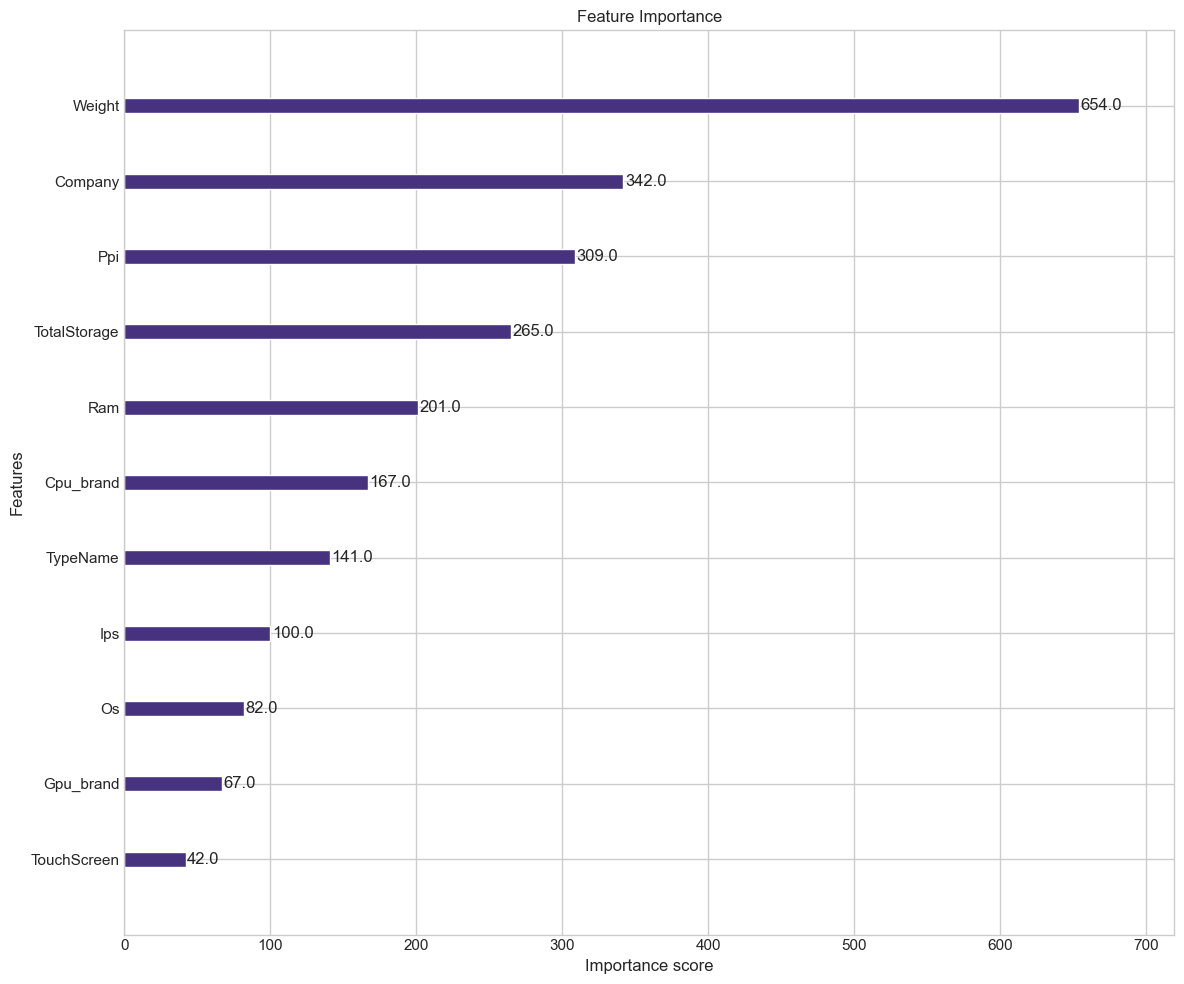

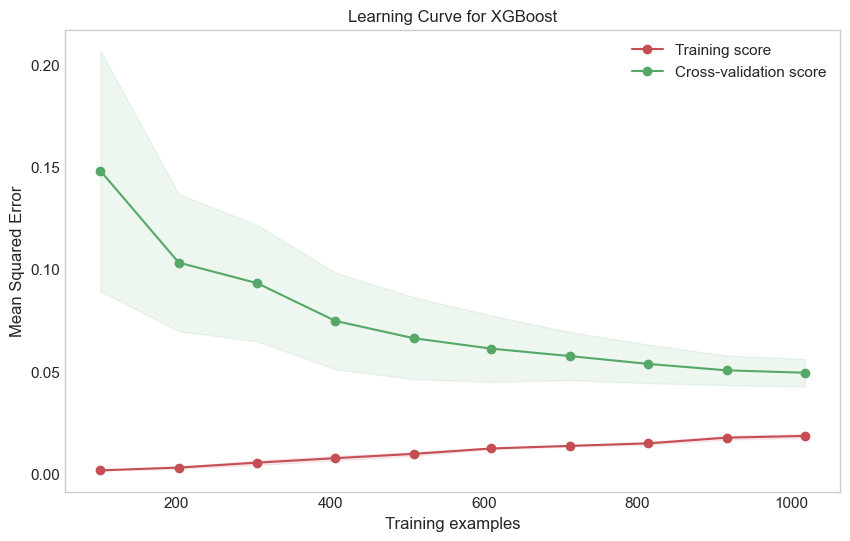

In [27]:
# XGBoost
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Check if we need to drop any rows with missing values
df = df.dropna()

# Feature engineering - we'll use TotalStorage and not include SSD and HDD separately
# First, let's define our features and target
# Assuming we want to predict Price
X = df.drop(['Price', 'SSD', 'HDD'], axis=1)  # Drop Price (target) and individual storage columns
y = df['Price']

# Encode categorical variables
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Ram', 'Weight', 'Ppi', 'TotalStorage']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# You can also try a learning curve to see how the model performs with different training set sizes
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

# Save the model for future use
xgb_model.save_model('xgb_laptop_price_model.json')



c:\Users\grach\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 118.4607 - mae: 10.8480 - val_loss: 81.2994 - val_mae: 8.9875
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.8595 - mae: 7.8757 - val_loss: 11.1582 - val_mae: 2.7858
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6539 - mae: 3.4735 - val_loss: 5.8457 - val_mae: 1.9788
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2033 - mae: 2.6140 - val_loss: 2.6086 - val_mae: 1.2735
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7839 - mae: 2.1268 - val_loss: 2.2950 - val_mae: 1.2316
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3164 - mae: 2.0345 - val_loss: 2.2233 - val_mae: 1.2375
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9625 - mae: 1.9984 - val_loss: 1.9760 - val_mae: 1.1728
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4938 - mae: 1.9365 - val_loss: 1.5503 - val_mae: 1.0207
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

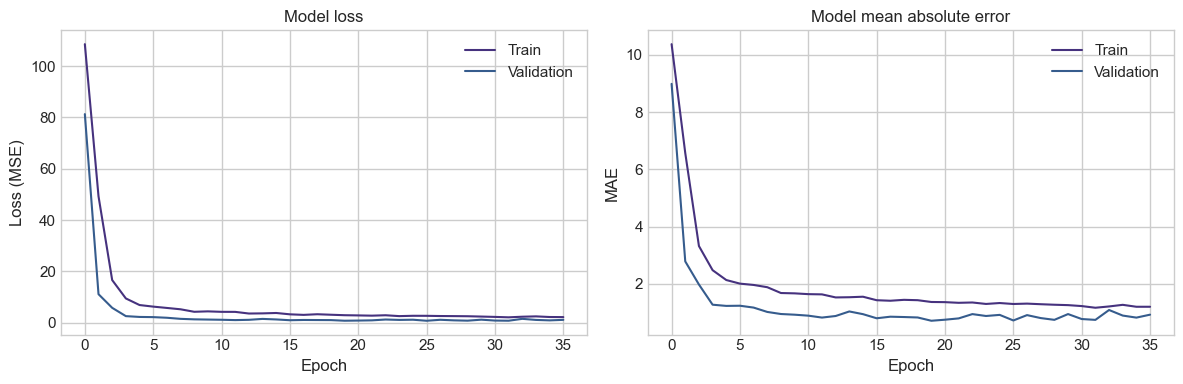

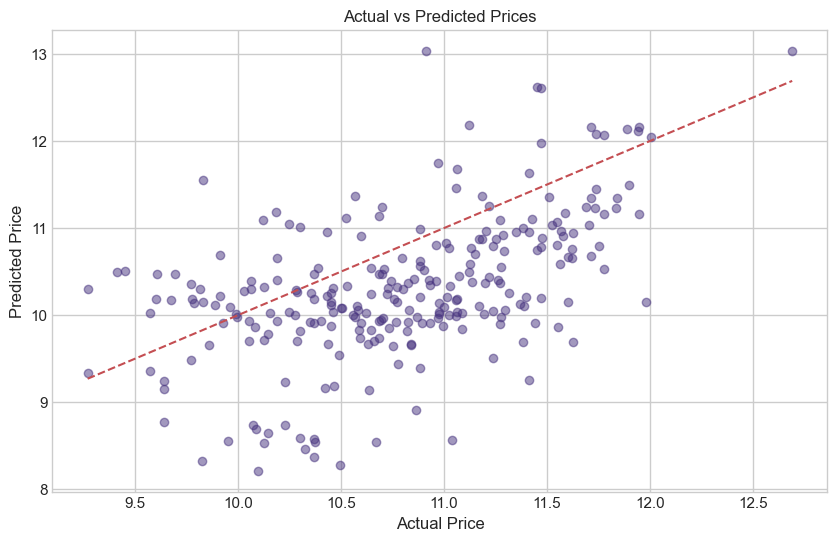

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


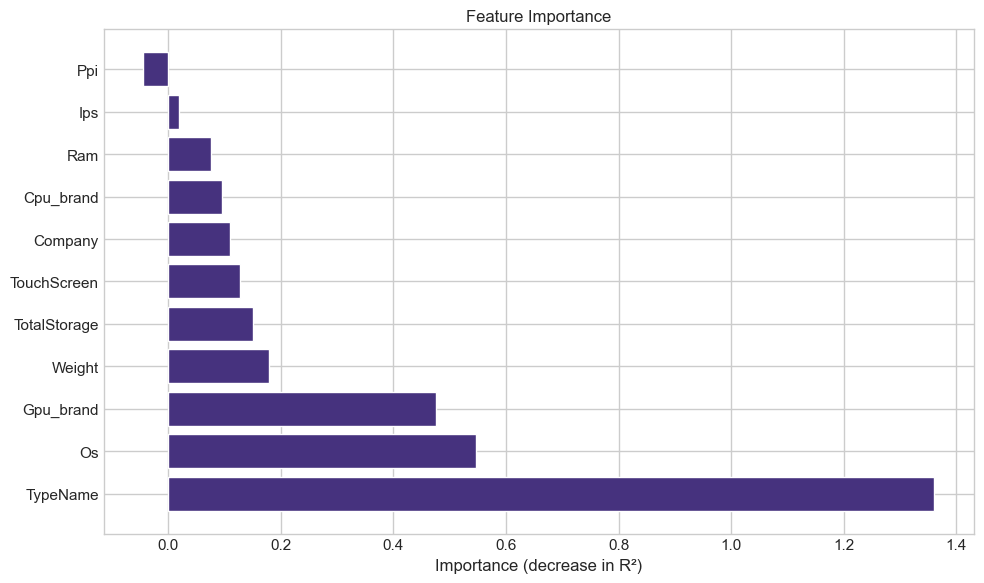

In [28]:
# neural network
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
df = pd.read_csv('laptop_data_cleaned_pca.csv')

# Check and drop any rows with missing values
df = df.dropna()

# Feature engineering - use TotalStorage instead of SSD and HDD
# Define features and target (assuming Price prediction)
X = df.drop(['Price', 'SSD', 'HDD'], axis=1)  # Drop Price and individual storage columns
y = df['Price']

# Encode categorical variables
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # Store encoders for future use

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Ram', 'Weight', 'Ppi', 'TotalStorage']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Get number of features
n_features = X_train.shape[1]

# Build the neural network model
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(n_features,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Create the model
nn_model = build_model()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = nn_model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation mean absolute error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Feature importance - using a simple permutation approach
def get_feature_importance(model, X, y):
    # Get baseline score
    baseline_pred = model.predict(X).flatten()
    baseline_score = r2_score(y, baseline_pred)
    
    importance = {}
    
    # For each feature
    for col in X.columns:
        # Create a copy of X
        X_permuted = X.copy()
        # Permute the feature
        X_permuted[col] = np.random.permutation(X_permuted[col].values)
        # Predict and calculate score
        perm_pred = model.predict(X_permuted).flatten()
        perm_score = r2_score(y, perm_pred)
        # Calculate importance as decrease in performance
        importance[col] = baseline_score - perm_score
    
    return importance

# Calculate and plot feature importance
feature_importance = get_feature_importance(nn_model, X_test, y_test)
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance (decrease in R²)')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Save the model
nn_model.save('nn_laptop_price_model.h5')

# Prediction function for new data
def predict_price(new_data, encoders, scaler, model):
    # Encode categorical variables
    for col in categorical_cols:
        if col in new_data:
            new_data[col] = encoders[col].transform([new_data[col]])[0]
    
    # Scale numerical features
    for col in numerical_cols:
        if col in new_data:
            new_data[col] = scaler.transform([[new_data[col]]])[0][0]
    
    # Convert to numpy array and reshape
    input_data = np.array([[new_data[col] for col in X.columns]])
    
    # Make prediction
    predicted_price = model.predict(input_data)[0][0]
    
    return predicted_price

# Example usage:
# new_laptop = {
#     'Company': 'Dell',
#     'TypeName': 'Ultrabook',
#     'Ram': 16,
#     'Weight': 1.8,
#     'TouchScreen': 0,
#     'Ips': 1,
#     'Ppi': 227,
#     'Cpu_brand': 'Intel',
#     'TotalStorage': 512,
#     'Gpu_brand': 'Intel',
#     'Os': 'Windows'
# }
# predicted_price = predict_price(new_laptop, encoders, scaler, nn_model)
# print(f'Predicted Price: ${predicted_price:.2f}')